# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised ML

##### **Contribution**    - Individual
##### **Name** - Sai Teja Ch

# **Project Summary -**

# The steps involved in making this project are:


**1. Know Your Data:**

  The first step in this machine learning project is to get to know the data. This involves importing necessary libraries and loading the dataset. Once the dataset is loaded, it is important to take a first look at the data and understand its rows and columns. The dataset information should be checked for duplicate values and missing or null values.

**2. Understanding Your Variables:**

  The next step is to understand the variables in the dataset. This involves describing the variables and checking their unique values. Data wrangling may be necessary to manipulate the data and gain insights.

**3. Data Visualization:**

Data visualization is an important part of this project. The goal is to understand the relationships between variables by experimenting with different charts. For each chart, it is important to explain why it was chosen and what insights were gained from it. These insights should be evaluated for their potential to create a positive business impact.

**4. Feature Engineering & Data Pre-processing:**

Feature engineering and data preprocessing are also important steps in this project. Missing values must be handled using appropriate imputation techniques. Data preprocessing may involve expansion and lower casing, removing punctuation, stopwords, and whitespace, text normalization and vectorization, data scaling, and dimensionality reduction. Outlier treatment techniques should also be used as necessary.

**5. ML Model Implementation:**

The final step in this project is to implement machine learning models. Several models are suggested including K-means clustering, hierarchical clustering, and the elbow method. Text data can be vectorized using TF-IDF. The performance of each model should be evaluated using appropriate evaluation metrics and cross-validation and hyperparameter tuning may be necessary.

**6. Conclusion:**

In conclusion, this machine learning project involves several steps including data exploration, data visualization, feature engineering, and model implementation. By following these steps carefully, it is possible to create a successful machine learning model that can be deployed on a live server for real user interaction.

# **GitHub Link -**

https://github.com/isaiteja2/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm

# Missing data visualization library
import missingno as msno

# Date and time utility modules
from dateutil.parser import parse

# Natural Language Processing libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.snowball import SnowballStemmer
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Preprocessing and machine learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import scipy.cluster.hierarchy as sch

# Miscellaneous libraries and settings
import collections as c 
import string 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [ ]:
# Load Dataset
df_main = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df_main.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
randc = df_main.shape
print(f'Total no. of Rows: {randc[0]}')
print(f'Total no. of Columns: {randc[1]}')

Total no. of Rows: 7787
Total no. of Columns: 12


### Dataset Information

In [ ]:
# Dataset Info
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_main.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_main.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

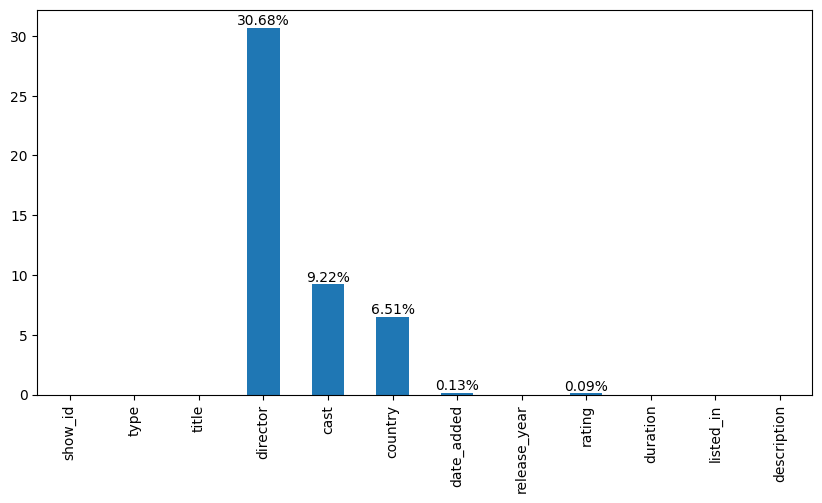

In [ ]:
# Calculate the percentage of null values in each column
plt.figure( figsize = (10 , 5))
null_percentages = df_main.isnull().mean() * 100

# Create a bar plot of the null percentages
ax = null_percentages.plot(kind='bar')

# Add the percentage above each bar
# for i in ax.containers:
#     ax.bar_label(i)

for i in ax.containers:
    labels = [f'{x:.2f}%' if x > 0 else '' for x in null_percentages]
    ax.bar_label(i, label_type='edge', labels=labels)

# Show the plot
plt.show()

### What did you know about your dataset?

 ### The observations I found are:

- The dataset consists of 7787 rows and 12 columns.
- There are no duplicate values in the dataset.
- The column with the highest percentage of null values is 'director', with almost 30% null values. This is followed by the 'cast' and 'country' columns, which have 9.2% and 6.7% null values respectively.
- All columns contain data of the object type, except for the 'release_year' column which is of integer type. This means that there is only one numerical column in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_main.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df_main.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description 

Here are the descriptions of each variable:

1. `show_id`: A unique identifier for each show.
2. `type`: The type of the show, either 'Movie' or 'TV Show'.
3. `title`: The title of the show.
4. `director`: The director(s) of the show.
5. `cast`: The main cast members of the show.
6. `country`: The country or countries where the show was produced.
7. `date_added`: The date when the show was added to Netflix.
8. `release_year`: The year when the show was released.
9. `rating`: The content rating of the show (e.g., TV-MA, PG-13).
10. `duration`: The duration of the show in minutes (for movies) or seasons (for TV shows).
11. `listed_in`: The genre(s) that the show belongs to.
12. `description`: A brief description of the show's plot.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df_main.nunique().sort_values(ascending=False)

show_id         7787
title           7787
description     7769
cast            6831
director        4049
date_added      1565
country          681
listed_in        492
duration         216
release_year      73
rating            14
type               2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Copying the main df
df_copy = df_main.copy()

In [ ]:
# Write your code to make your dataset analysis ready.

# Create new features to store date, day, month and year seperately.
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'])
df_copy[['day_name','day_added', 'year_added', 'month_added']] = df_copy['date_added'].apply(lambda x: pd.Series([x.day_name(),x.day, x.year, x.month]))

In [ ]:
# Saving tv-series and movies in a variable
tv_series = df_copy.query('type == "TV Show"')
movies = df_copy.query('type == "Movie"')

In [ ]:
df_mov = movies.copy()
df_tv = tv_series.copy()

In [ ]:
# Replaceing min from duration 
movies.duration = movies.duration.str.replace('min','').astype(int)

# Replacing duration with seasons
tv_series.rename(columns = {'duration':'seasons'},inplace=True)
tv_series['seasons'].replace({'1 Season':'1 Seasons'},inplace = True)
tv_series.seasons = tv_series.seasons.str.replace(' Seasons','').astype(int)

In [ ]:
# Adding custom ratings to make it easily understandable
rating_categories = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

# creating separate column
df_copy['rat_cats'] = df_copy['rating'].map(rating_categories)

# changing 'type'
df_copy['type'] = pd.Categorical(df_copy['type'])

# creating column accordingly if used sort
df_copy['rat_cats'] = pd.Categorical(df_copy['rat_cats'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])


In [ ]:
# Changing types of all other necessary columns
columns = ['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description','day_name']
df_copy[columns] = df_copy[columns].astype('string')

In [ ]:
df_copy.sample()

show_id   type              title                       director  \
796    s797  Movie  Because of Soccer  Agasyah Karim, Khalid Kashogi   

                                                  cast    country date_added  \
796  Herjunot Ali, Winky Wiryawan, Erly Ashy, Laura...  Indonesia 2018-12-08   

     release_year rating duration                               listed_in  \
796          2008  TV-14   75 min  Comedies, Dramas, International Movies   

                                           description  day_name  day_added  \
796  After losing a World Cup bet, two hapless budd...  Saturday        8.0   

     year_added  month_added rat_cats  
796      2018.0         12.0    Teens

### What all manipulations have you done and insights you found?

1. The 'date_added' column was converted into a datetime format and new columns were created to extract information such as 'day_name', 'day_added', 'year_added', and 'month_added'.

2. Created a new variable for tv-series and movies using 'type'.
3. Using above variables we created two dataframes for movies and tv-series named 'df_mov and 'df_tv'.
4. The ‘rating’ column contained several categories, so for better understanding, it was categorized into 4 basic categories: kids, older kids, teens, and adults. 
5. Changed types of necessary columns to strings.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

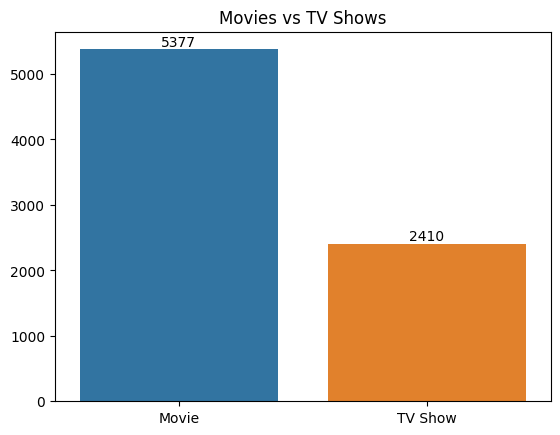

In [ ]:
# Chart - 1 visualization code
# plot bwn movies and tv
type_counts = df_copy['type'].value_counts()
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# Add the values on top of the bars
for i, count in enumerate(type_counts):
    ax.text(i, count, count, ha='center', va='bottom')

plt.title('Movies vs TV Shows')
plt.show()

##### 1. Why did you pick the specific chart?

To show the number of movies and tv shows count

##### 2. What is/are the insight(s) found from the chart?

There are more movies when compared to the tv shows produced

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This may show that we have to increase the production of tv shows

#### Chart - 2

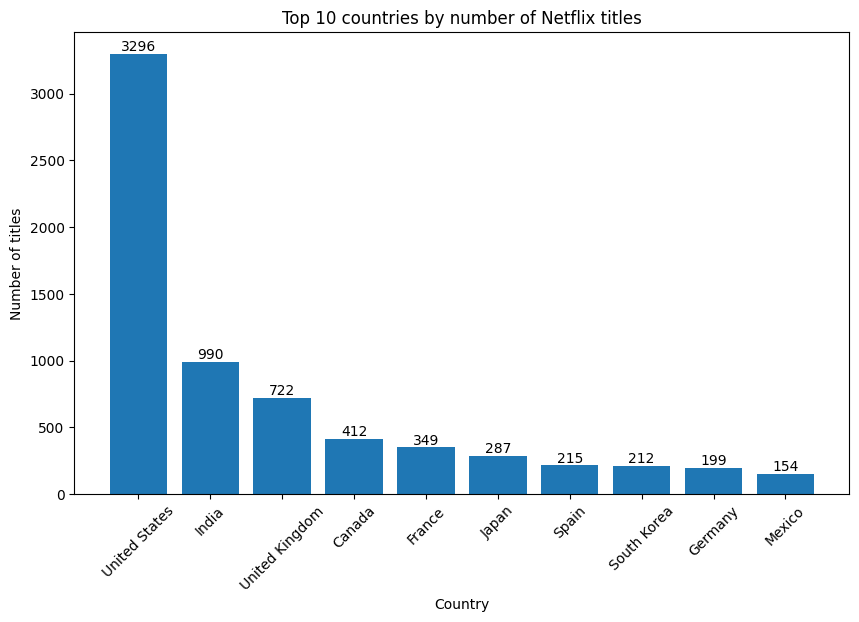

In [ ]:
# Chart - 2 visualization code
# Top 10 countries 
country_split = df_copy['country'].str.split(', ', expand=True)

# Stack the resulting DataFrame to create a Series with one country per row
country_stack = country_split.stack().reset_index(drop=True)

# Count the number of titles by country
titles_by_country = country_stack.value_counts()

# Select the top 10 countries by number of titles
top_10_countries = titles_by_country.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of titles')

# Add the values on top of the bars
for i, count in enumerate(top_10_countries):
    plt.text(i, count, count, ha='center', va='bottom')

plt.title('Top 10 countries by number of Netflix titles')
plt.show()

##### 1. Why did you pick the specific chart?

To know top 10 countries with many videos available

##### 2. What is/are the insight(s) found from the chart?

US having more number of titles and no other country is even near to it.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Netflix need to increase the content in lot of other countries inorder to expand its popularity.

#### Chart - 3

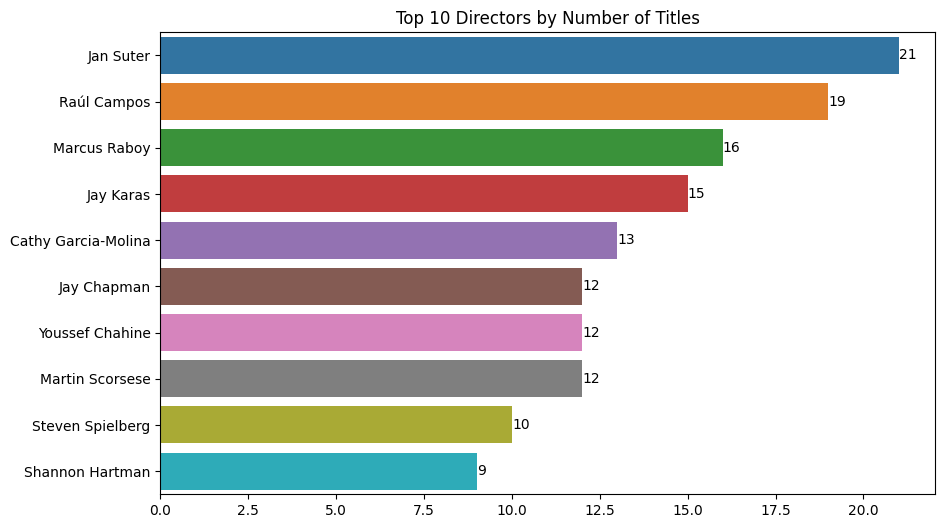

In [ ]:
# Chart - 3 visualization code
# Creating top 10 directors
directors = df_copy[df_copy.director != 'No Director'].director.str.split(', ', expand=True).stack()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=directors.value_counts().values[:10], y=directors.value_counts().index[:10])

# Add the values at the end of the bars
for i, count in enumerate(directors.value_counts().values[:10]):
    ax.text(count, i, count, ha='left', va='center')

# Add a title to the plot

plt.title('Top 10 Directors by Number of Titles')

plt.show()

##### 1. Why did you pick the specific chart?

To find the top 10 directors

##### 2. What is/are the insight(s) found from the chart?

This plot shows Jan suter, Raul campos and Marcus Raboy are the 3 directors with higher directiorial ventures

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To give new directors with some more chances to prove themselves

#### Chart - 4

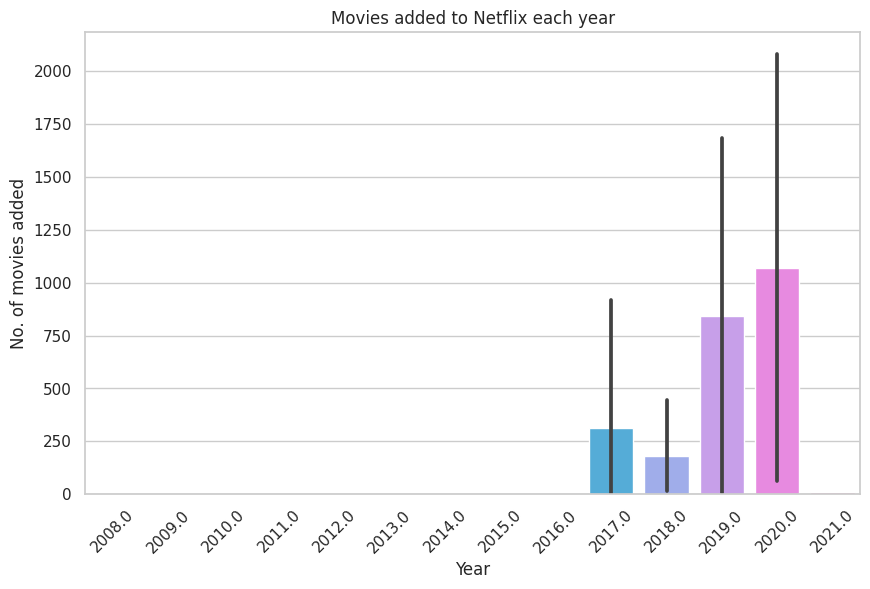

In [ ]:
# Chart - 4 visualization code
# To visualize movies added to netflix each year
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df_copy, x='year_added', y=df_copy['year_added'].value_counts())
plt.xticks(rotation=45)
plt.title('Movies added to Netflix each year')
plt.ylabel('No. of movies added')
plt.xlabel('Year')
plt.show()

##### 1. Why did you pick the specific chart?

To show how many movies added to netflix each year.

##### 2. What is/are the insight(s) found from the chart?

2020 and 2019 are the years with highest added

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that the content push is high in the lockdown as content viewing is at the highest peak

#### Chart - 5

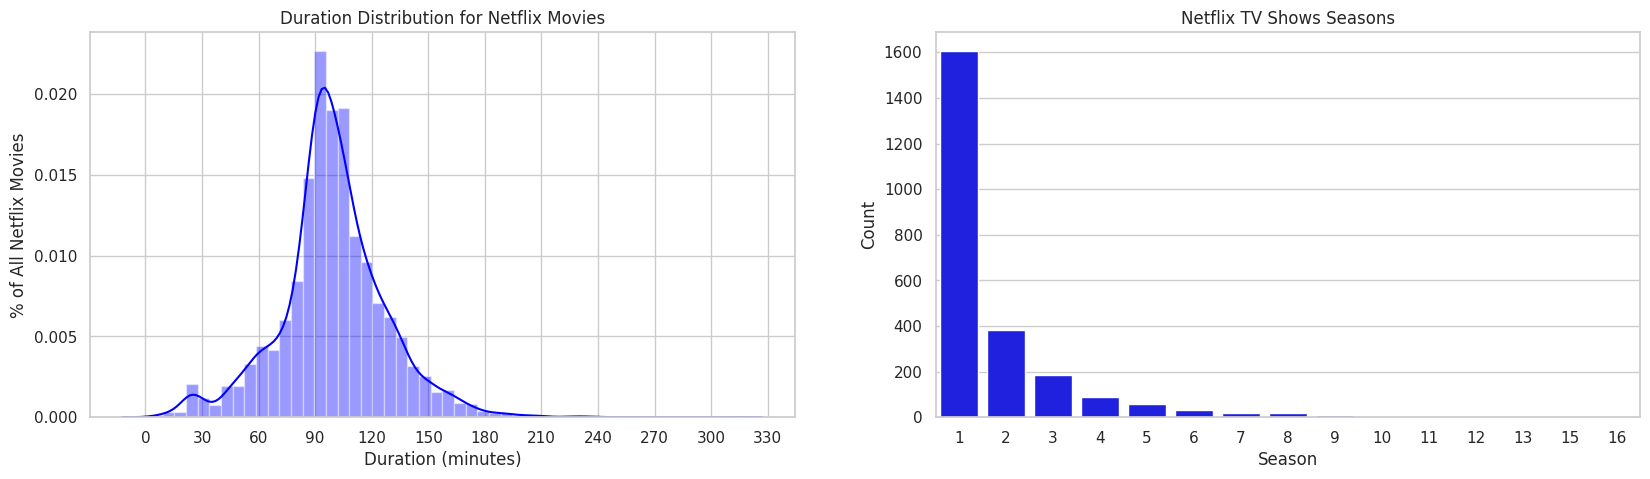

In [ ]:
# Chart - 5 visualization code
# values for 'movies'
fig, ax = plt.subplots(1,2, figsize=(20, 5))
mv = sns.distplot(movies.duration, color='blue',ax=ax[0]);
mv.set_xticks(np.arange(0,360,30))
mv.set_title("Duration Distribution for Netflix Movies")
mv.set_ylabel("% of All Netflix Movies")
mv.set_xlabel("Duration (minutes)")

# Get the value counts of the 'seasons' column
season_counts = tv_series['seasons'].value_counts()

# Create a count plot using Seaborn
tv = sns.barplot(x=season_counts.index, y=season_counts.values, color='blue',ax=ax[1])
tv.set_title("Netflix TV Shows Seasons")
tv.set_ylabel("Count")
tv.set_xlabel("Season")
fig.show()

##### 1. Why did you pick the specific chart?

A histogram is a graphical representation of the distribution of numerical data using bars to show the frequency of data in different ranges or bins.

##### 2. What is/are the insight(s) found from the chart?

1. Average movie duarion is 90 to 94 minutes.
2. Mostly seasons are ending after first.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, especially in the tv shows they need to concentrate on script selection as most series are ended after first season.

#### Chart - 6

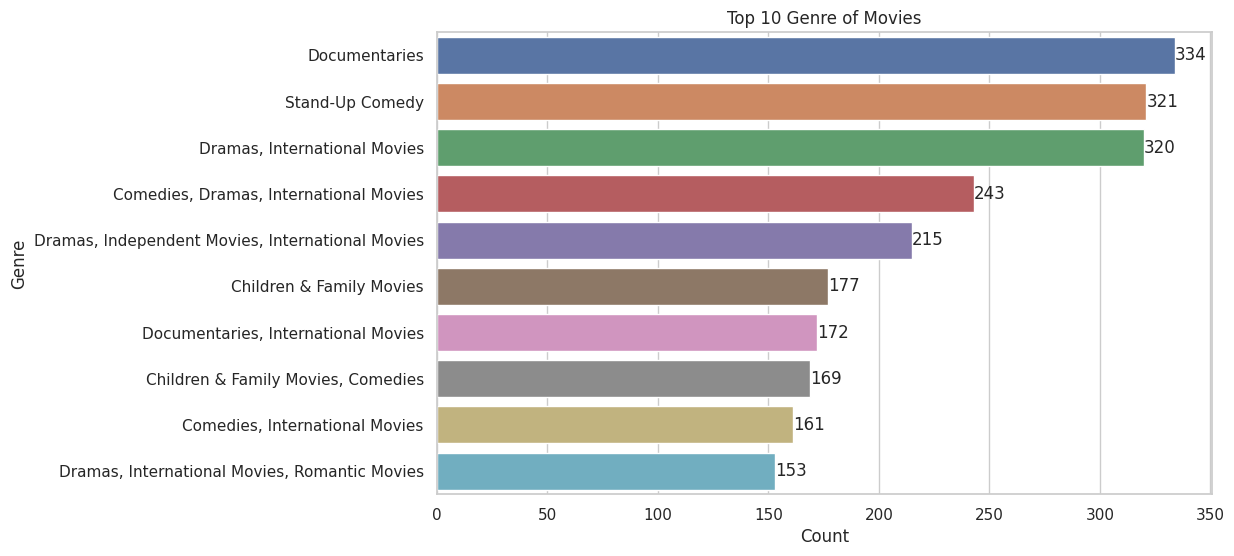

In [ ]:
# Chart - 6 visualization code
# Get the top 10 genres by value counts
top_genres = movies['listed_in'].value_counts().index[0:10]

# Create a count plot of the top 10 genres
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=movies['listed_in'], data=movies, order=top_genres)
# Set the x and y axis labels
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
ax.set_title('Top 10 Genre of Movies')

# Add the values at the end of the bars
for i, count in enumerate(movies['listed_in'].value_counts()[top_genres]):
    ax.text(count, i, count, ha='left', va='center')

plt.show()

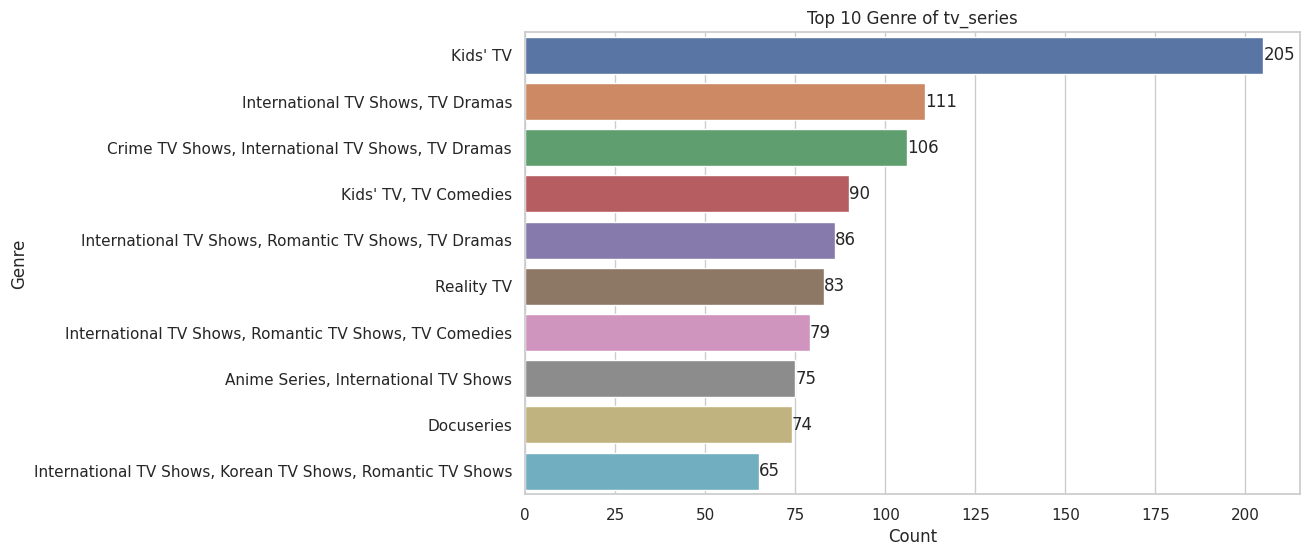

In [ ]:
top_genres_tv = tv_series['listed_in'].value_counts().index[0:10]
# Create a count plot of the top 10 genres
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=tv_series['listed_in'], data=tv_series, order=top_genres_tv)
# Set the x and y axis labels
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
ax.set_title('Top 10 Genre of tv_series')

# Add the values at the end of the bars
for i, count in enumerate(tv_series['listed_in'].value_counts()[top_genres_tv]):
    ax.text(count, i, count, ha='left', va='center')

plt.show()

##### 1. Why did you pick the specific chart?

To find top genres of both movies and tv

##### 2. What is/are the insight(s) found from the chart?

1. In movies Documentaries are popular.
2. In Tv kids shows are popular

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Trying to understand the trends and making content accordingly can show huge changes in viewer ship.

#### Chart - 7

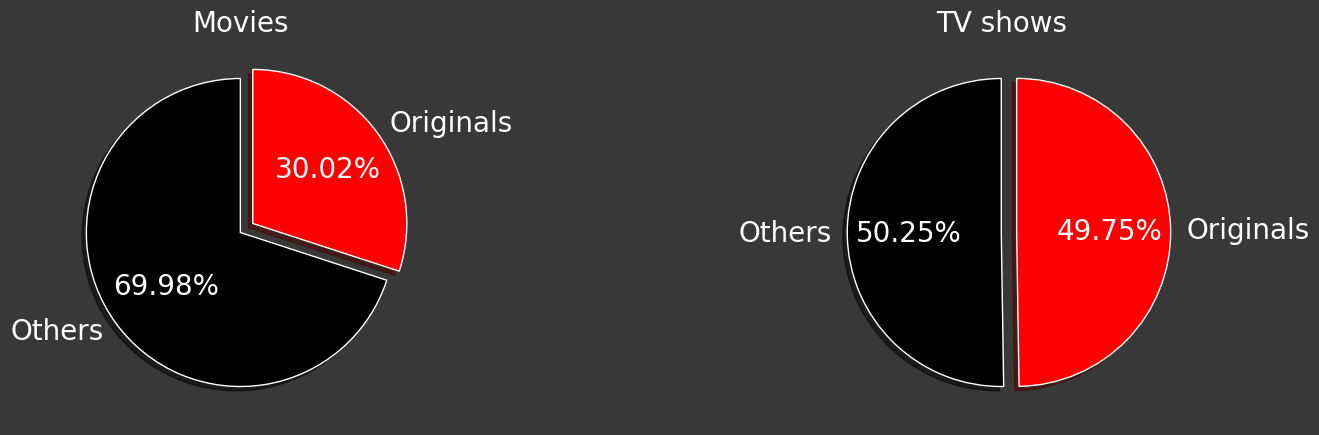

In [ ]:
# Chart - 7 visualization code
# Create a new column in the movies DataFrame to indicate whether a movie is an original or not
df_mov['originals'] = np.where(df_mov['release_year'] == df_mov['year_added'], 'Yes', 'No')

# Create a new column in the TV shows DataFrame to indicate whether a TV show is an original or not
df_tv['originals'] = np.where(df_tv['release_year'] == df_tv['year_added'], 'Yes', 'No')

# Set up the figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5), facecolor="#383838")

# Set the explode and text properties for the pie charts
explode = (0, 0.1)
textprops = {'color': "white", 'fontsize': 20}

# Create a pie chart for movies
ax[0].set_title('Movies', color='white', fontsize=20)
ax[0].pie(df_mov['originals'].value_counts(), explode=explode, autopct='%.2f%%',
          labels=['Others', 'Originals'], shadow=True, startangle=90,
          textprops=textprops, colors=['black', 'red'])

# Create a pie chart for TV shows
ax[1].set_title('TV shows', color='white', fontsize=20)
ax[1].pie(df_tv['originals'].value_counts(), explode=explode, autopct='%.2f%%',
          labels=['Others', 'Originals'], shadow=True, startangle=90,
          textprops=textprops, colors=['black', 'red'])

plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a circular plot that displays one series of data as slices representing the percentage of each part. It displays which has higher i.e. originals or others

##### 2. What is/are the insight(s) found from the chart?

1. Movies have very less originals.
2. Tv shows are a about 50% originals.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a need to produce more original content in movies.

#### Chart - 8

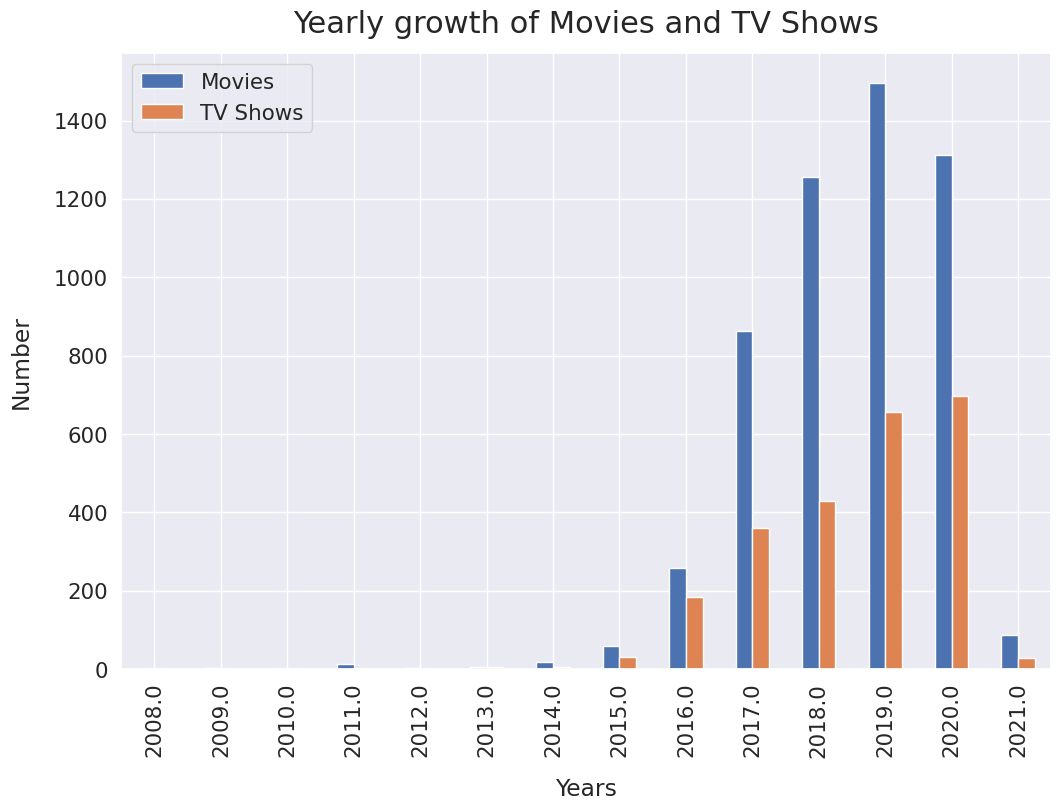

In [ ]:
# Get the number of movies and TV shows added per year
movies_year = movies['year_added'].value_counts().sort_index(ascending=False)
tvshows_year = tv_series['year_added'].value_counts().sort_index(ascending=False)

# Combine the data into a single DataFrame
yearly_data = pd.DataFrame({'Movies': movies_year, 'TV Shows': tvshows_year})

# Create a grouped bar plot of the data
sns.set(font_scale=1.4)
yearly_data.plot(kind='bar', figsize=(12, 8))
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Yearly growth of Movies and TV Shows", y=1.02, fontsize=22)

plt.show()

##### 1. Why did you pick the specific chart?

To show the Yearly growth of Movies and TV Shows

##### 2. What is/are the insight(s) found from the chart?

There is a constant growth in movies and series which is a good sign.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as  this directly shows results in the content present in the application. Which directly increases the library and attracts the viewers.

#### Chart - 9

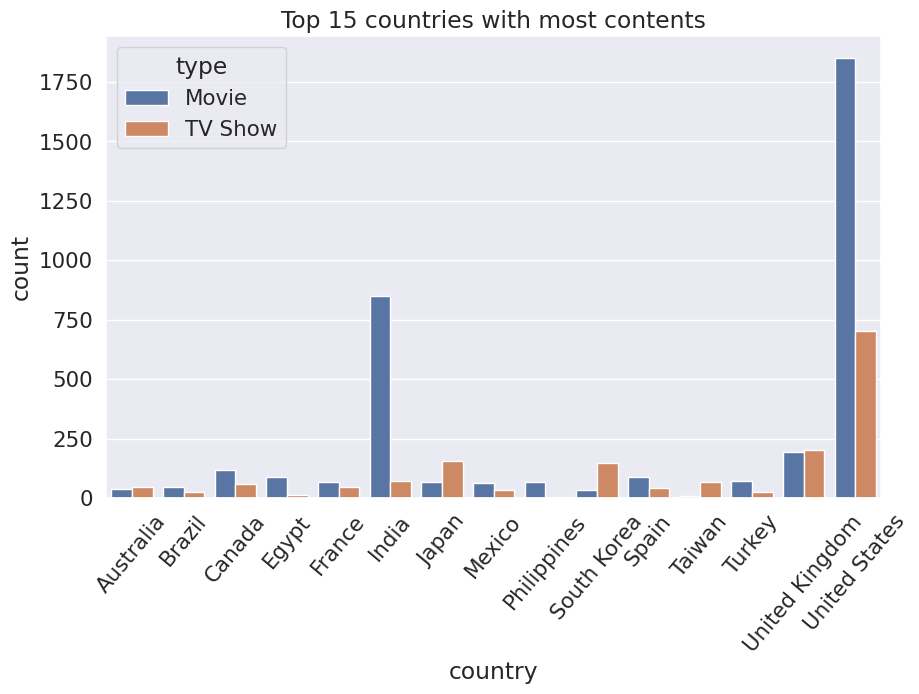

In [ ]:
# Get the top 15 countries by content count
top_countries = df_copy['country'].value_counts().index[0:15]

# Create a DataFrame with the counts for each country and type
country_counts = df_copy[df_copy['country'].isin(top_countries)].groupby(['country', 'type']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='country', y='count', hue='type', data=country_counts)
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents')
plt.show()

##### 1. Why did you pick the specific chart?

To plot Top 15 countries with most contents.

##### 2. What is/are the insight(s) found from the chart?

US has the highest number and no other country is even near.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix really need to improve content in other countries to gain higher viewership

#### Chart - 10

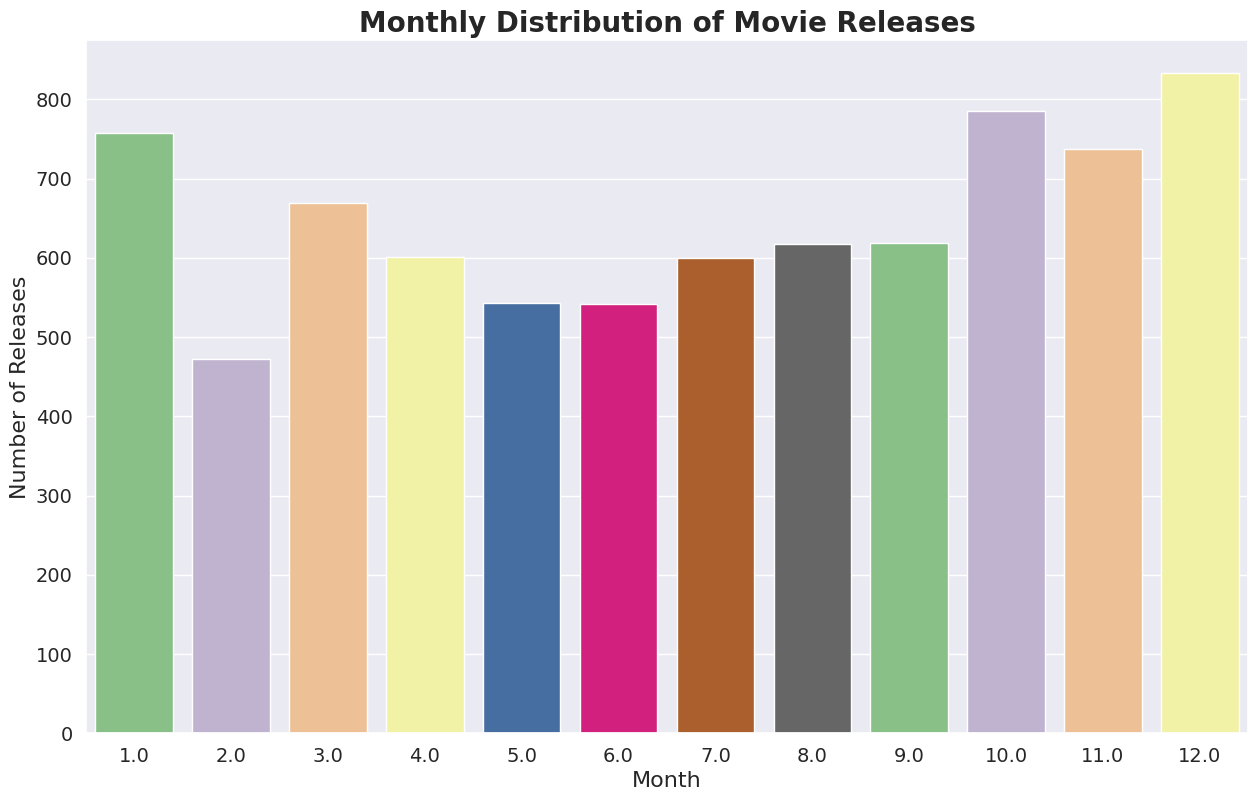

In [ ]:
# Chart - 10 visualization code
# Monthly distribution of movie releses
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added', data=df_copy, palette="Accent")

plt.title('Monthly Distribution of Movie Releases', size='20', fontweight="bold")
plt.xlabel('Month', size='16')
plt.ylabel('Number of Releases', size='16')
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

##### 1. Why did you pick the specific chart?

To plot Monthly distribution of movie releses.

##### 2. What is/are the insight(s) found from the chart?

October and december are the top two months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In middle months there is a high gap.

#### Chart - 11

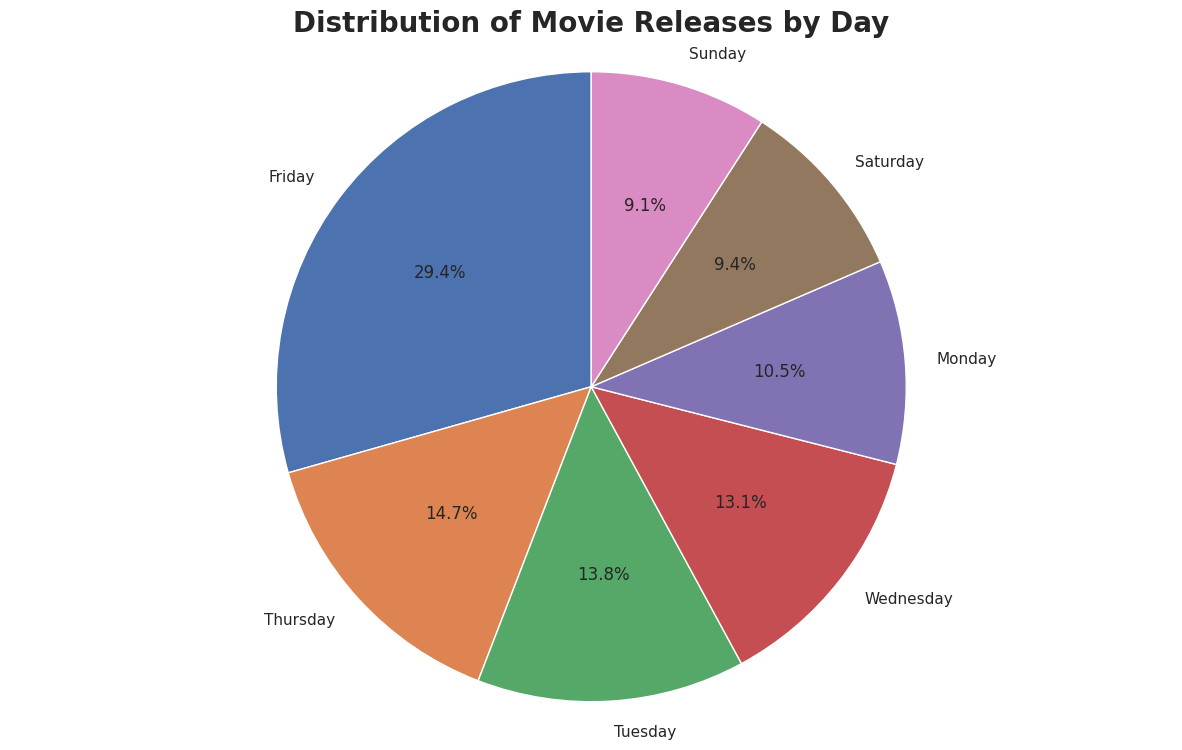

In [ ]:
# Chart - 11 visualization code
# Create a DataFrame with the counts for each day
day_counts = df_copy['day_name'].value_counts().reset_index(name='count')
day_counts.columns = ['day', 'count']

# Create a pie chart
fig, ax = plt.subplots(figsize=(15, 9))
ax.pie(day_counts['count'], labels=day_counts['day'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribution of Movie Releases by Day', size='20', fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

TO show which day has highest releases.

##### 2. What is/are the insight(s) found from the chart?

Friday has the most releases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since it is a weekend most people arre likely watch and has a higher chances to be on trending.

#### Chart - 12

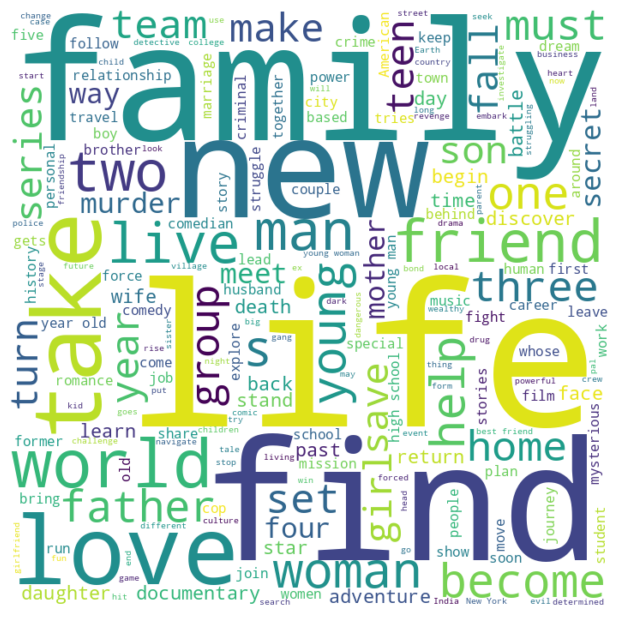

In [ ]:
# Combine the text from the 'description' column into one string
text = " ".join(df_copy['description'])

# Create a set of stopwords
stopwords = set(STOPWORDS)

# Create a word cloud using the WordCloud library
wordcloud = WordCloud(width=700, height=700,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10,
                      colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

To make a word tree

##### 2. What is/are the insight(s) found from the chart?

Words like 'life','family','new' and 'find' are mostly seen in the description

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the content made and available is basically family, life related.

#### Chart - 13

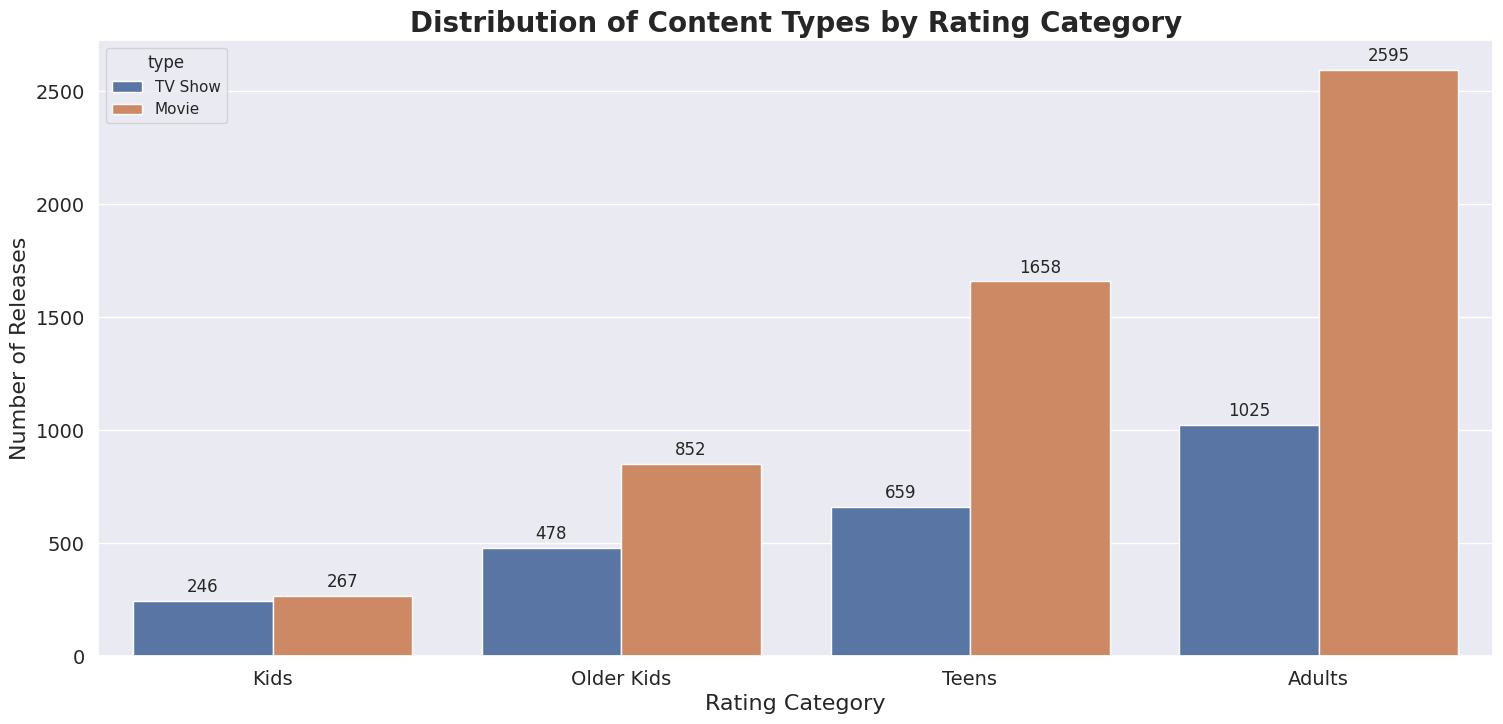

In [ ]:
# Ploting the distribution of content
plt.figure(figsize=(18,8))
ax = sns.countplot(x='rat_cats', hue='type', data=df_copy)

plt.title('Distribution of Content Types by Rating Category', size='20', fontweight="bold")
plt.xlabel('Rating Category', size='16')
plt.ylabel('Number of Releases', size='16')
plt.xticks(size='14')
plt.yticks(size='14')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

##### 1. Why did you pick the specific chart?

To plot Distribution of Content Types by Rating Category.

##### 2. What is/are the insight(s) found from the chart?

Most content made are for adults.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It would be ideal if the content produced was suitable for all age groups to watch.

#### Chart - 14 - Correlation Heatmap

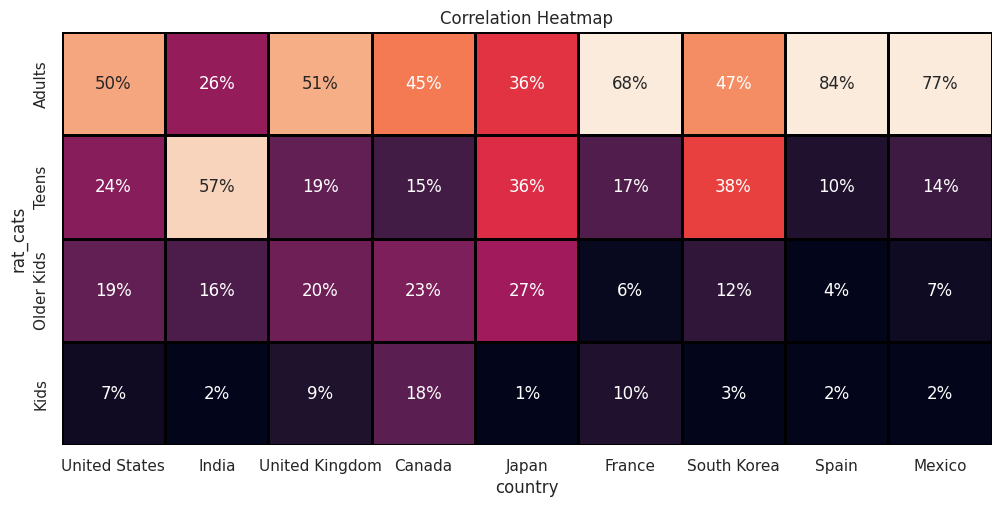

In [ ]:
# Add a count column to the df_copy DataFrame
df_copy['count'] = 1

# Get the top 10 countries by count
top_countries = df_copy.groupby('country')['count'].sum().sort_values(ascending=False).head(10).index

# Create a heatmap DataFrame by calculating the normalized cross-tabulation of country and rat_cats for the top 10 countries
heatmap_df = pd.crosstab(df_copy.loc[df_copy['country'].isin(top_countries), 'country'], df_copy['rat_cats'], normalize="index").T

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(heatmap_df.loc[['Adults', 'Teens', 'Older Kids', 'Kids'], ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']], annot=True, linecolor='Black', linewidths=1.0, square=True, cbar=False, fmt='1.0%', vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize":12})
ax.set_title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

This is correlation heatmap

##### 2. What is/are the insight(s) found from the chart?

1. Spain has high adult content.
2. India has more teen content.
3. Japan has older kids content.
4. Canada has kids content.

#### Chart - 15 - Pair Plot 

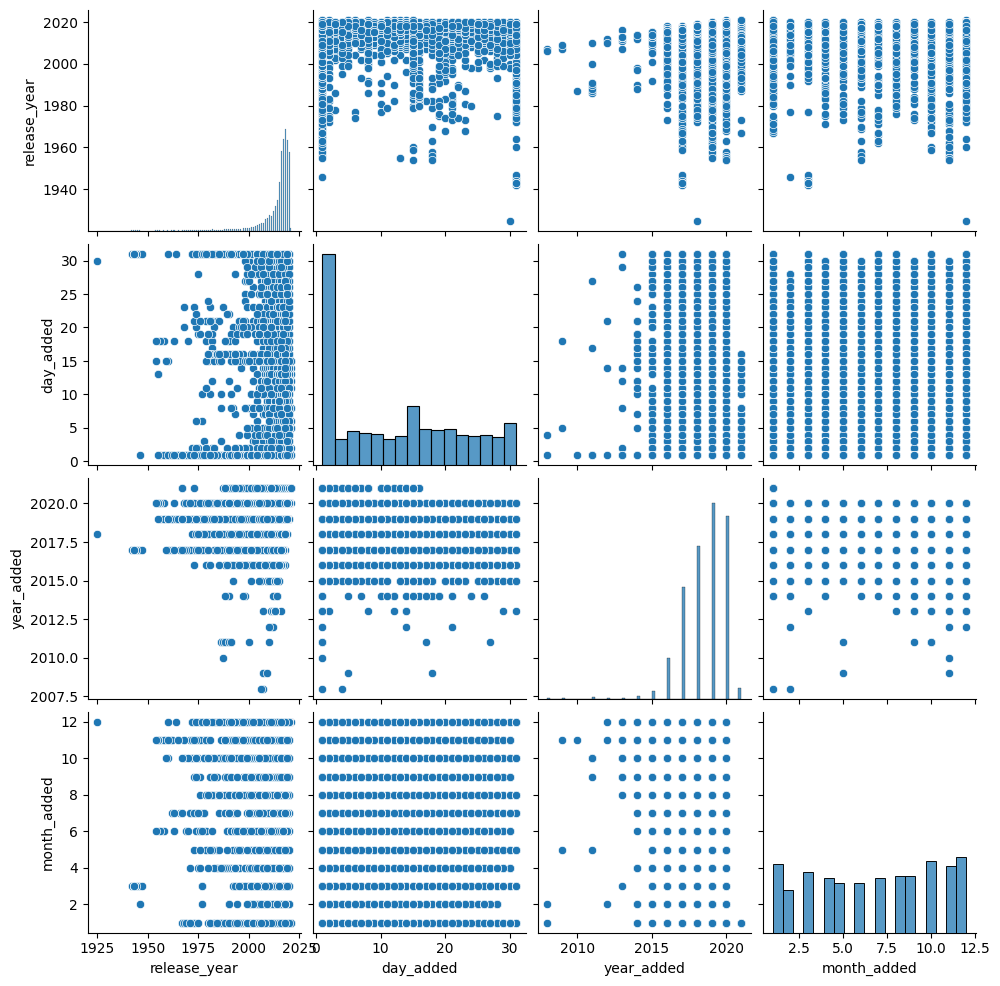

In [ ]:
# Pair Plot visualization code
sns.pairplot(data=df_copy)

##### 1. Why did you pick the specific chart?

A pair plot helps identify the best features to explain the relationship between two variables or to form distinct clusters.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Copying the dataset
df_fe = df_copy.copy()

In [ ]:
# Null values
df_fe.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
day_name          10
day_added         10
year_added        10
month_added       10
rat_cats           7
dtype: int64

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_fe['director'].fillna('unknown', inplace=True)
df_fe['cast'].fillna('unknown', inplace=True)
df_fe['country'].fillna(value=df_fe['country'].mode()[0], inplace=True)
df_fe.dropna(subset=['date_added', 'day_added', 'year_added', 'month_added', 'rating', 'rat_cats'], inplace=True)

In [ ]:
df_fe.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_name        0
day_added       0
year_added      0
month_added     0
rat_cats        0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing value imputation techniques we used are:

* For the 'Director' and 'Cast' columns, missing values were filled with the string 'unknown'.
* For the 'Country' column, missing values were filled with the mode of the column.
* For the 'Date_added', 'Day_added', 'Year_added', 'Month_added', 'Rating', and 'Rat_cats' columns, rows containing missing values were dropped.

### 2. Data Preprocessing

#### 1) Expantion and lower casing.

In [ ]:
# Checking if there are any nans
df_fe[['description', 'listed_in', 'director', 'cast', 'country', 'rating']].isna().any()

description    False
listed_in      False
director       False
cast           False
country        False
rating         False
dtype: bool

In [ ]:
# Categorising and lowering the values into lower cases
categorised_df = df_fe[['title']]
categorised_df['cluster_data'] = (df_fe[['description', 'listed_in', 'director', 'cast', 'country', 'rating']].astype(str).apply(' '.join, axis=1)).str.lower()
categorised_df.head()

title                                       cluster_data
0     3%  in a future where the elite inhabit an island ...
1   7:19  after a devastating earthquake hits mexico cit...
2  23:59  when an army recruit is found dead, his fellow...
3      9  in a postapocalyptic world, rag-doll robots hi...
4     21  a brilliant group of students become card-coun...

Q) Why we do lower case text?

Ans: 

This is done to standardize the text data and reduce the dimensionality of the data. Converting all text to lower case ensures that words are treated consistently regardless of their capitalization. 

For example, the words ‘The’ and ‘the’ would be treated as two separate words if case sensitivity is preserved, but would be treated as the same word if the text is converted to lower case.

By standardizing the text data in this way, it becomes easier to perform operations such as removing stopwords and punctuation, as well as other preprocessing steps such as tokenization and stemming. This can help improve the performance of natural language processing tasks such as text classification and sentiment analysis.

#### 2. Removing punctuations, stopwords and whitespaces. 

In [ ]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# For removing punctuations
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Removing stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Removing white spaces
def remove_extra_whitespace(text):
    return ' '.join(text.split())

categorised_df['cluster_data'] = categorised_df['cluster_data'].apply(remove_punctuation).apply(remove_stopwords).apply(remove_extra_whitespace)
categorised_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


title                                       cluster_data
0     3%  future elite inhabit island paradise far crowd...
1   7:19  devastating earthquake hits mexico city trappe...
2  23:59  army recruit found dead fellow soldiers forced...
3      9  postapocalyptic world ragdoll robots hide fear...
4     21  brilliant group students become cardcounting e...

Q) Why do we remove punctuations, stopwords and whitespaces?

This is done to reduce the dimensionality of the data and improve the performance of natural language processing tasks.

Punctuation marks and whitespaces do not usually carry significant meaning in text data and can be safely removed without affecting the overall meaning of the text. Stopwords are common words such as ‘the’, ‘is’, and ‘and’ that do not carry significant meaning on their own and can also be safely removed.

#### 3. Text normalisation and vectorisation 

In [ ]:
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Perform stemming on the cluster_data column
categorised_df['cluster_data'] = categorised_df['cluster_data'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))
categorised_df.head()

# Create new columns in df_fe DataFrame to store the length of the listed_in and description columns
df_fe['Length(listed_in)'] = df_fe['listed_in'].str.len()
df_fe['Length(description)'] = df_fe['description'].str.len()
df_fe.head()


show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description   day_name  day_added  \
0  In a future where the elite inhabit an island ...     Friday       14.0   
1  After a devastating earthquake hits Mexico Cit...     Friday       23.0   
2  When an army recruit is found dead, his fellow...   Thursday       20.0   
3  In a postapocalyptic world, rag-doll robots hi...   Thursday       16.0   
4  A brilliant group of students become card-coun...  Wednesday        1.0   

   year_added  month_added rat_cats  Length(listed_in)  Length(description)  \
0      2020.0          8.0   Adults                 54                  136   
1      2016.0         12.0   Adults                 28                  148   
2      2018.0         12.0   Adults                 35                  149   
3      2017.0         11.0    Teens                 56                  145   
4      2020.0          1.0    Teens                  6                  143   

   Cluster Label  
0              1  
1              0  
2              1  
3              1  
4              0

In [ ]:
# Fill NaN values in the description column with empty strings and create a TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_fe['description'].fillna(''))

# Print the shape of the tfidf_matrix
print(tfidf_matrix.shape)

(7770, 17888)


In [ ]:
df_fe.sample(3)

show_id     type                                   title      director  \
452     s453  TV Show                America's Next Top Model       unknown   
4036   s4037    Movie                                 Menorca  John Barnard   
3102   s3103  TV Show  Jack Whitehall: Travels with My Father       unknown   

                                                   cast         country  \
452                                          Tyra Banks   United States   
4036  Tammy Gillis, Sheila Campbell, Talia Pura, Dor...   Canada, Spain   
3102                  Jack Whitehall, Michael Whitehall  United Kingdom   

     date_added  release_year rating   duration  \
452  2020-11-15          2013  TV-14  2 Seasons   
4036 2017-08-27          2016  TV-MA     81 min   
3102 2020-09-22          2020  TV-MA  4 Seasons   

                                              listed_in  \
452                                          Reality TV   
4036                         Dramas, Independent Movies   
3102  British TV Shows, Docuseries, International TV...   

                                            description day_name  day_added  \
452   Supermodel Tyra Banks created and executive-pr...   Sunday       15.0   
4036  A hedonistic soccer mom takes a voyage of self...   Sunday       27.0   
3102  Jovial comic Jack Whitehall invites his stuffy...  Tuesday       22.0   

      year_added  month_added rat_cats  Length(listed_in)  Length(description)  
452       2020.0         11.0    Teens                 10                  150  
4036      2017.0          8.0   Adults                 26                  150  
3102      2020.0          9.0   Adults                 52                  145

Q) What did we do?

1. The Snowball Stemmer is a normalization technique that reduces words to their base form, reducing the dimensionality of the data.
2. TF-IDF is a vectorization technique that converts text into numerical vectors that can be used as input for machine learning algorithms.
3. TF-IDF analyzes the frequency and importance of words in the text, allowing algorithms to focus on the most meaningful elements of the text.
4. Normalization and vectorization can improve the performance of natural language processing tasks by reducing noise in the data.
5. Using techniques such as Snowball Stemming and TF-IDF can help improve the accuracy and effectiveness of natural language processing tasks.

#### 4. Data scaling and Dimentionality reduction

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Scale the Length(description) and Length(listed_in) columns of the df_fe DataFrame
X = StandardScaler().fit_transform(df_fe[['Length(description)', 'Length(listed_in)']])

# Calculate the silhouette score for a range of cluster sizes
silhouette_scores = []
for n_clusters in range(2, 16):
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds)
    silhouette_scores.append([n_clusters, round(score, 2)])
    print(f'For n_clusters = {n_clusters}, silhouette score is {score}')



For n_clusters = 2, silhouette score is 0.3941905094189749
For n_clusters = 3, silhouette score is 0.43498587872384165
For n_clusters = 4, silhouette score is 0.4476424492936694
For n_clusters = 5, silhouette score is 0.41772611160150686
For n_clusters = 6, silhouette score is 0.4277360676860168
For n_clusters = 7, silhouette score is 0.43222017610178404
For n_clusters = 8, silhouette score is 0.42690421144937
For n_clusters = 9, silhouette score is 0.39538996014752953
For n_clusters = 10, silhouette score is 0.39781144614418806
For n_clusters = 11, silhouette score is 0.390532456690979
For n_clusters = 12, silhouette score is 0.3944124637549282
For n_clusters = 13, silhouette score is 0.3935383110539725
For n_clusters = 14, silhouette score is 0.383749961843159
For n_clusters = 15, silhouette score is 0.3938925678861283


Text(0, 0.5, 'cumulative explained variance')

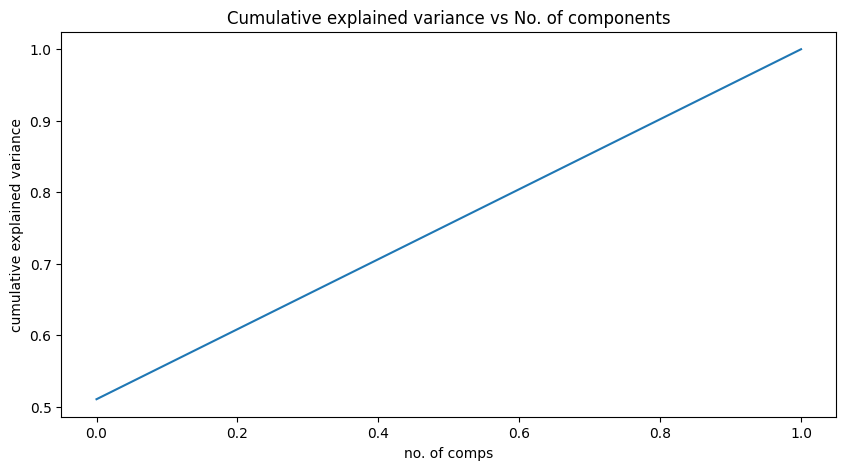

In [ ]:
# Perform dimensionality reduction using PCA with 2 components
x_pca = PCA(n_components=2).fit_transform(X)

# Plot the cumulative explained variance vs number of components
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(PCA().fit(X).explained_variance_ratio_))
plt.title('Cumulative explained variance vs No. of components')
plt.xlabel('no. of comps')
plt.ylabel('cumulative explained variance')

In [ ]:
x_pca.shape

(7770, 2)

Q) Why do we do Data scaling and Dimentionality reduction?

Data scaling and dimensionality reduction are important preprocessing steps in machine learning.


1. Data scaling transforms the data to have zero mean and unit variance, improving the performance of machine learning algorithms.
2. The StandardScaler is a common technique for data scaling that standardizes the data by removing the mean and scaling to unit variance.
3. Dimensionality reduction reduces the number of features in the data, making it easier to analyze and visualize.
4. PCA is a common technique for dimensionality reduction that identifies patterns in the data and reduces its dimensionality while retaining as much information as possible.
5. Data scaling and dimensionality reduction can improve the performance of machine learning algorithms by reducing noise in the data and allowing them to focus on the most important features.

## ***6. ML Model Implementation***

### ML Model - 1 - K- means

In [ ]:
df_ml = df_fe.copy()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# ML Model - 1 K means
k_clusters = 4
# Fit the Algorithm
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=9, max_iter=600, tol=0.000001, random_state=31)
model.fit(X)
# Predict on the model
clusters = model.predict(X)
# silhouette s_score :
s_score = silhouette_score(X, clusters)
print(f"Silhouette s_score: {s_score}")


Silhouette s_score: 0.44761470302252365


In [ ]:
# Add column for the clusters:
df_fe["Cluster Label"] = clusters
df_fe.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description   day_name  day_added  \
0  In a future where the elite inhabit an island ...     Friday       14.0   
1  After a devastating earthquake hits Mexico Cit...     Friday       23.0   
2  When an army recruit is found dead, his fellow...   Thursday       20.0   
3  In a postapocalyptic world, rag-doll robots hi...   Thursday       16.0   
4  A brilliant group of students become card-coun...  Wednesday        1.0   

   year_added  month_added rat_cats  Length(listed_in)  Length(description)  \
0      2020.0          8.0   Adults                 54                  136   
1      2016.0         12.0   Adults                 28                  148   
2      2018.0         12.0   Adults                 35                  149   
3      2017.0         11.0    Teens                 56                  145   
4      2020.0          1.0    Teens                  6                  143   

   Cluster Label  
0              1  
1              0  
2              1  
3              1  
4              0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
v_val = pd.DataFrame(silhouette_scores , columns = ["n clusters" , "silhouette score"])
v_val = v_val.sort_values( "silhouette score" , ascending = False )
v_val.head(15) 

n clusters  silhouette score
2            4              0.45
1            3              0.43
4            6              0.43
5            7              0.43
6            8              0.43
3            5              0.42
7            9              0.40
8           10              0.40
0            2              0.39
9           11              0.39
10          12              0.39
11          13              0.39
13          15              0.39
12          14              0.38

For n_clusters = 2 The average silhouette_score is : 0.39416413076348666
For n_clusters = 3 The average silhouette_score is : 0.43498587872384165
For n_clusters = 4 The average silhouette_score is : 0.4474346057530305
For n_clusters = 5 The average silhouette_score is : 0.4179451658408099
For n_clusters = 6 The average silhouette_score is : 0.42784748146378654
For n_clusters = 7 The average silhouette_score is : 0.43178905879748486
For n_clusters = 8 The average silhouette_score is : 0.42222443355937683
For n_clusters = 9 The average silhouette_score is : 0.3956524074165999
For n_clusters = 10 The average silhouette_score is : 0.3949818235709966
For n_clusters = 11 The average silhouette_score is : 0.39231962393545666
For n_clusters = 12 The average silhouette_score is : 0.3923191080640547
For n_clusters = 13 The average silhouette_score is : 0.3907297123344184
For n_clusters = 14 The average silhouette_score is : 0.3982108256771202
For n_clusters = 15 The average silhouette_score is :

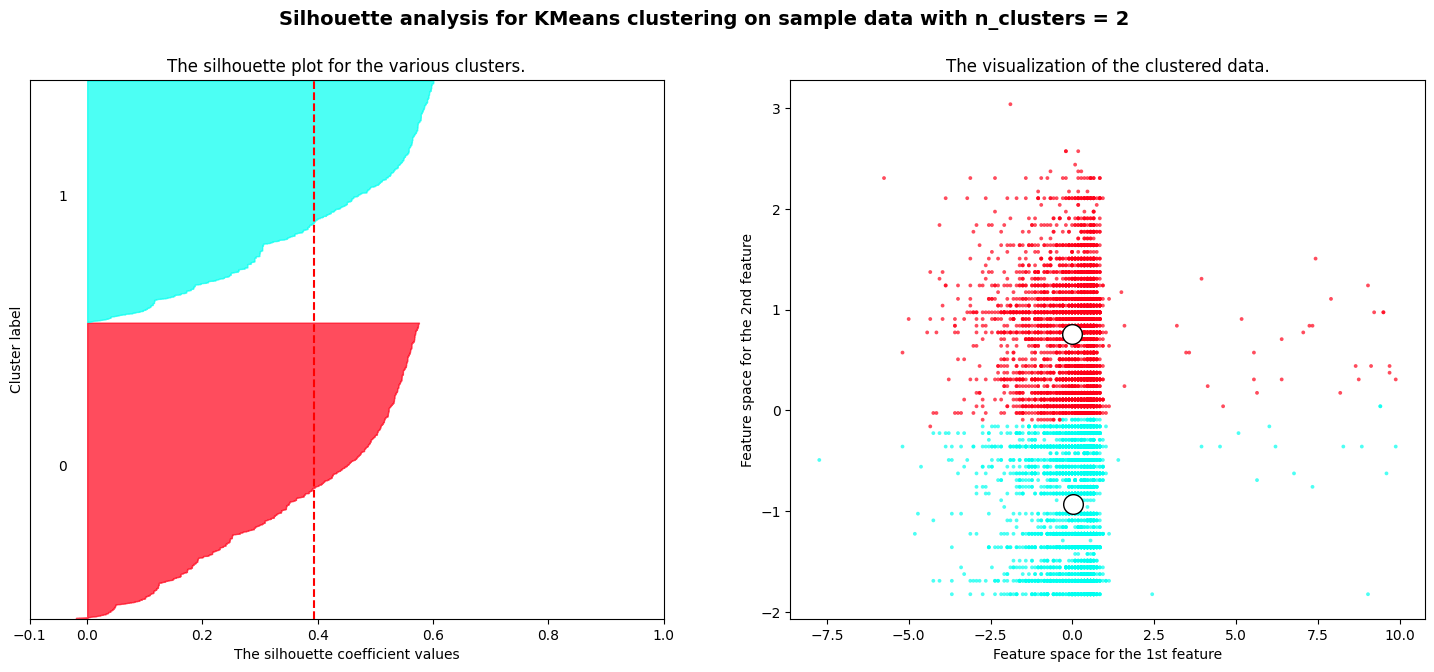

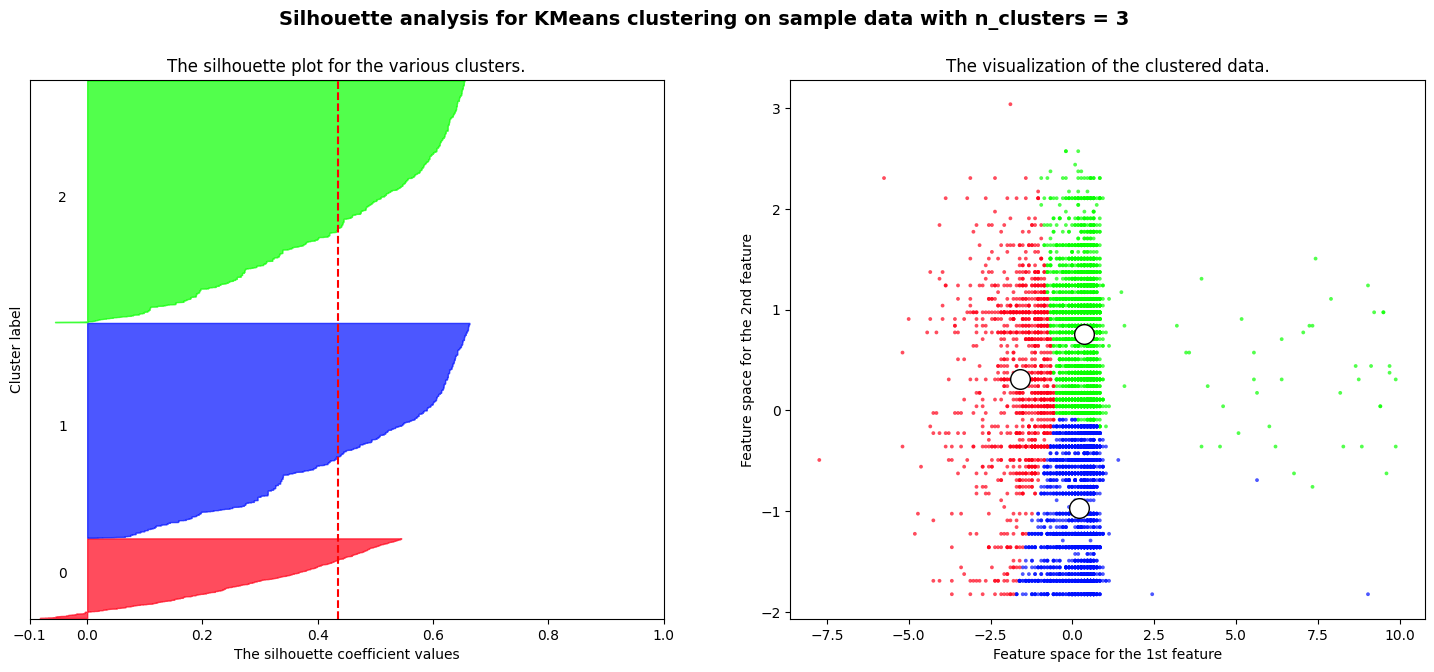

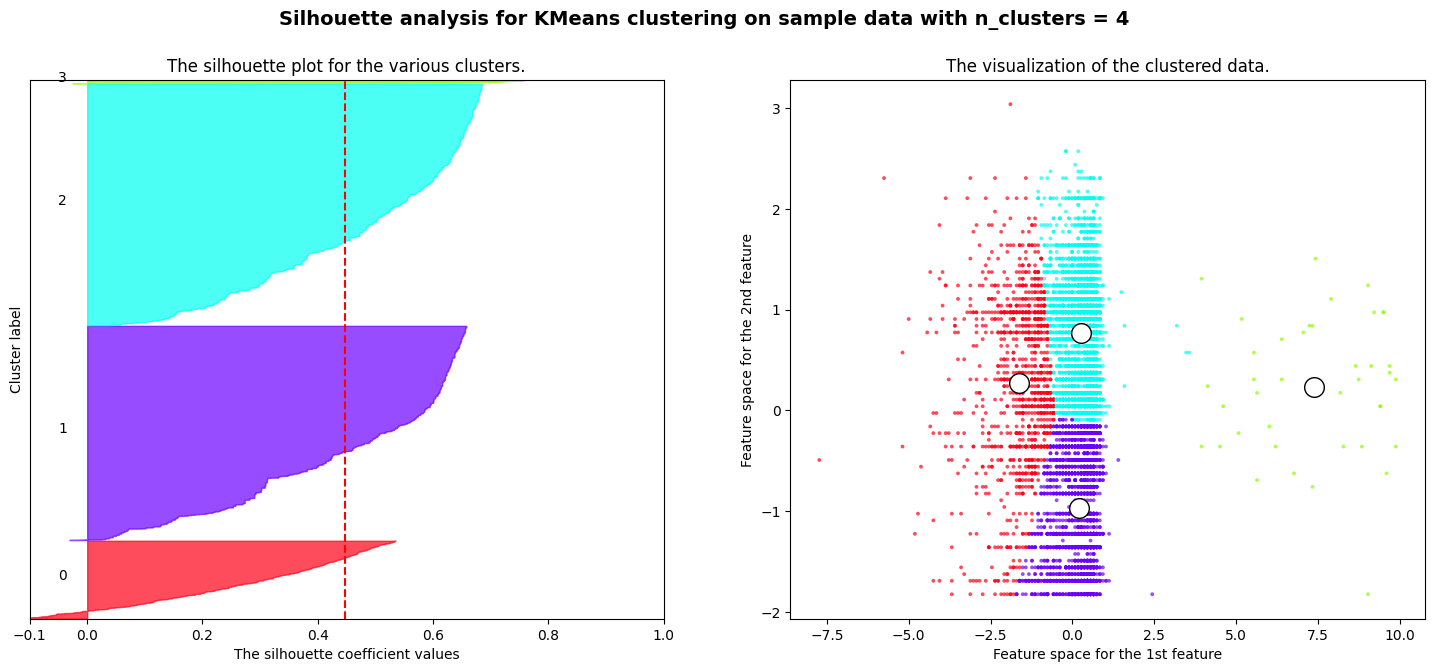

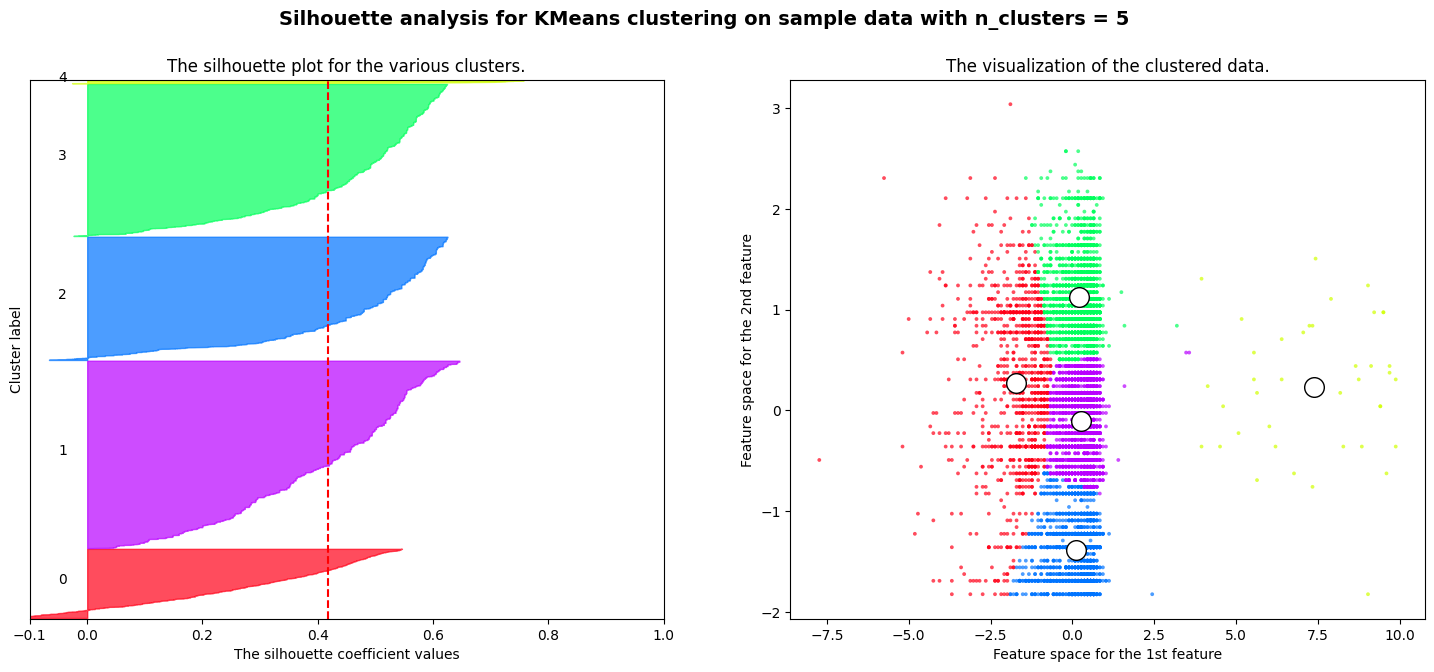

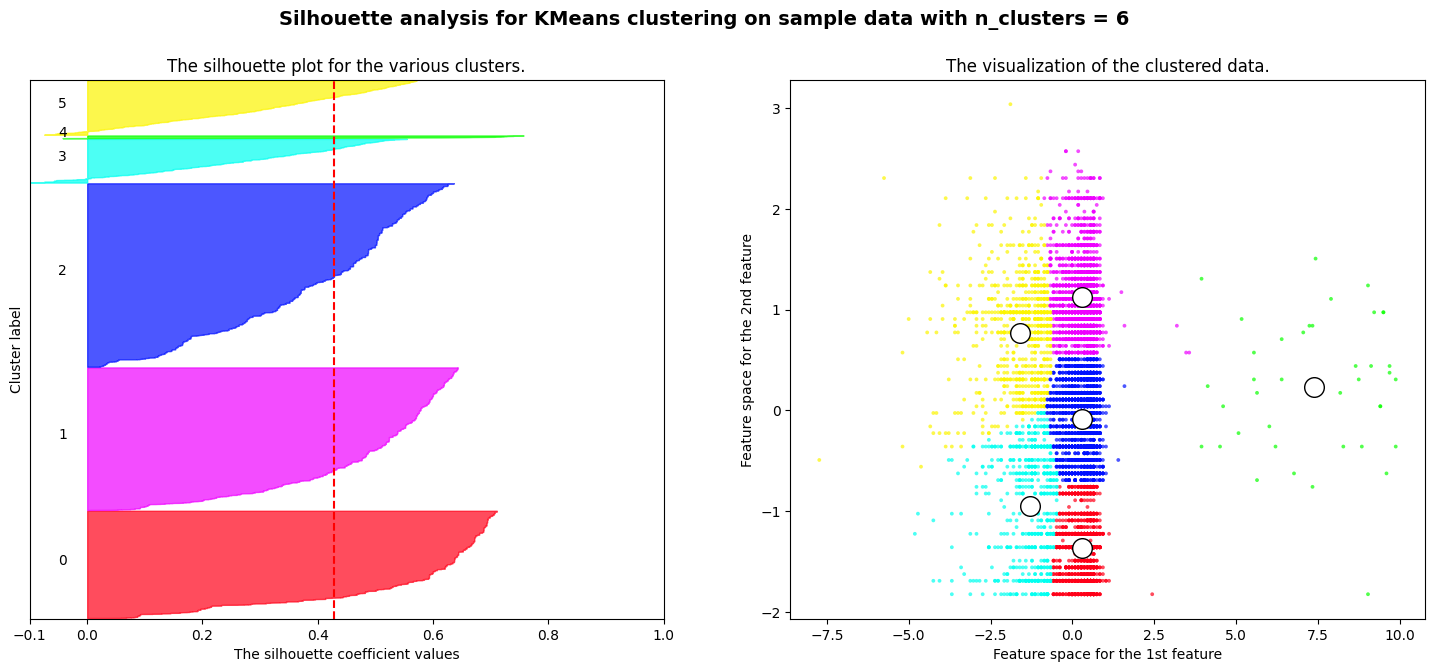

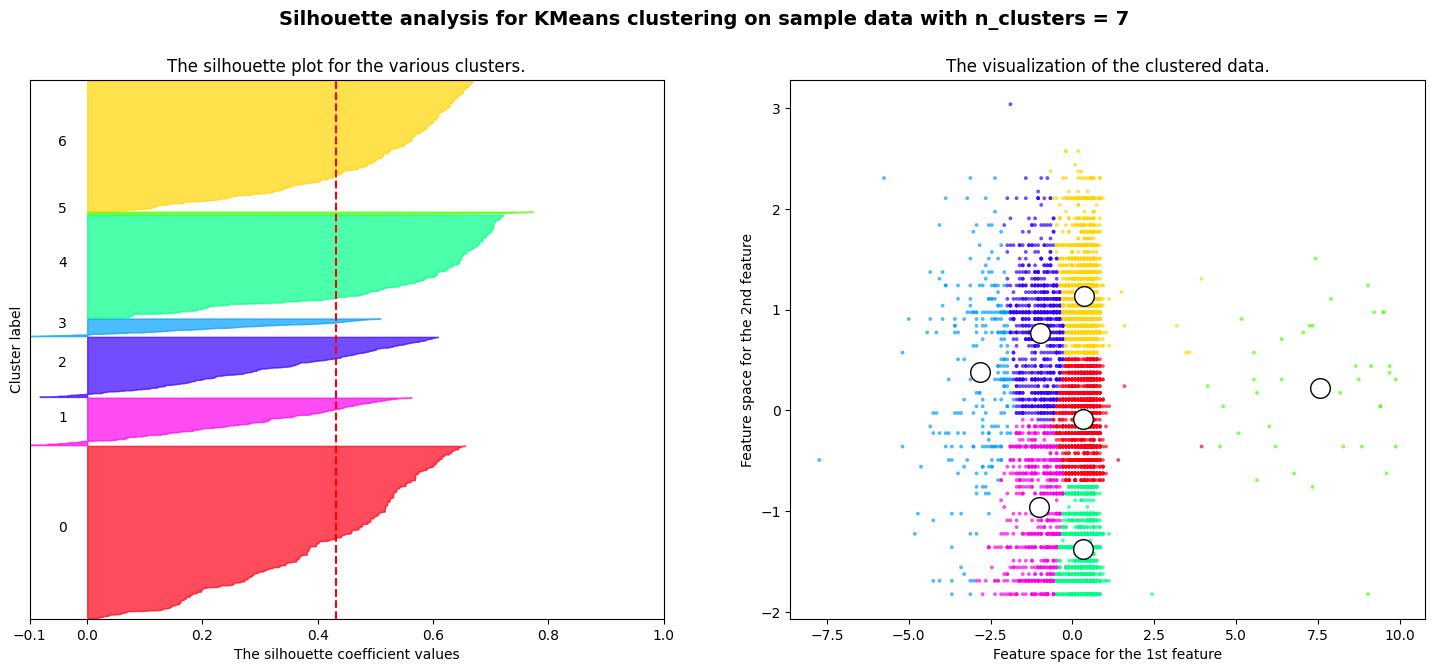

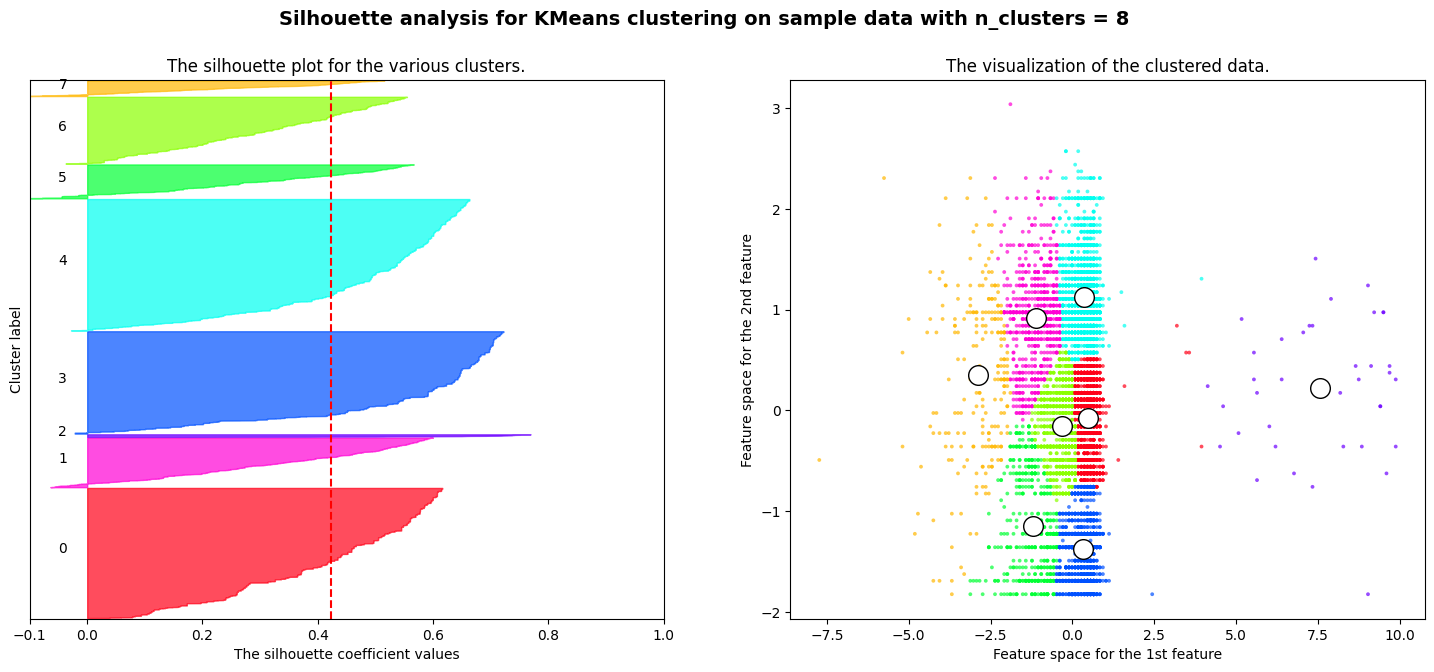

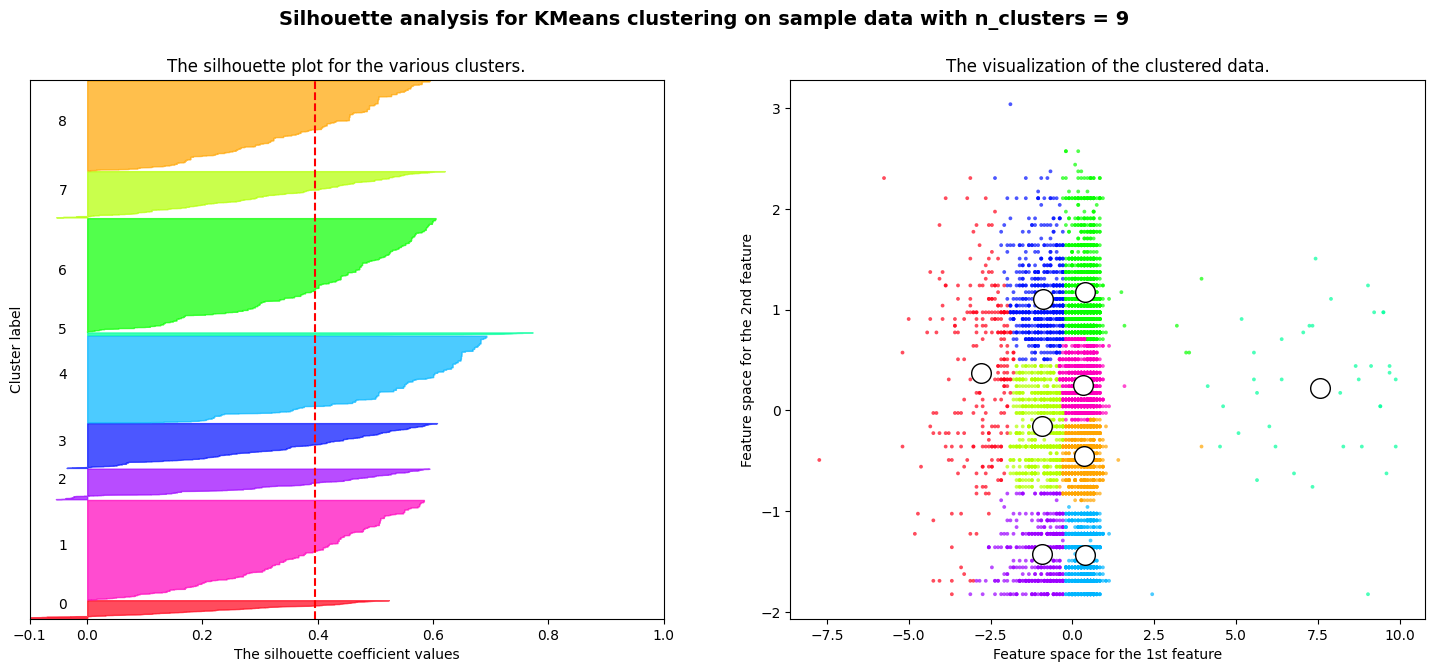

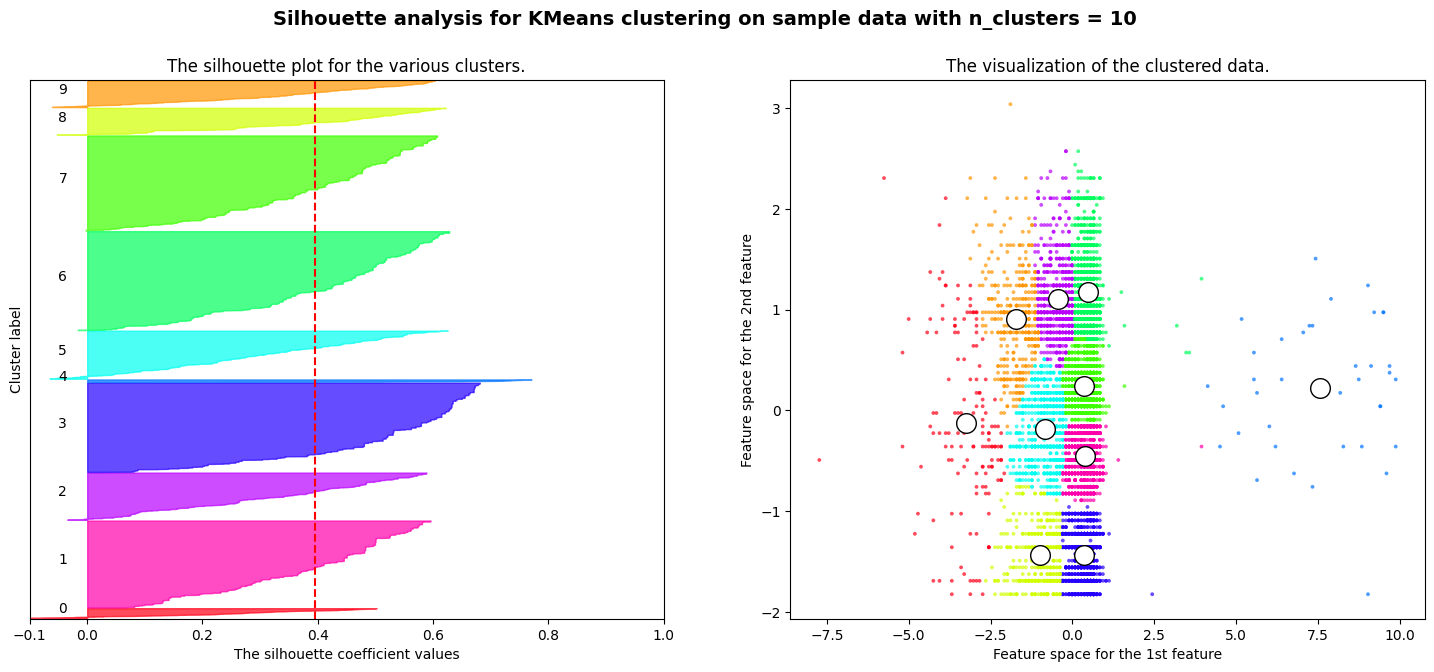

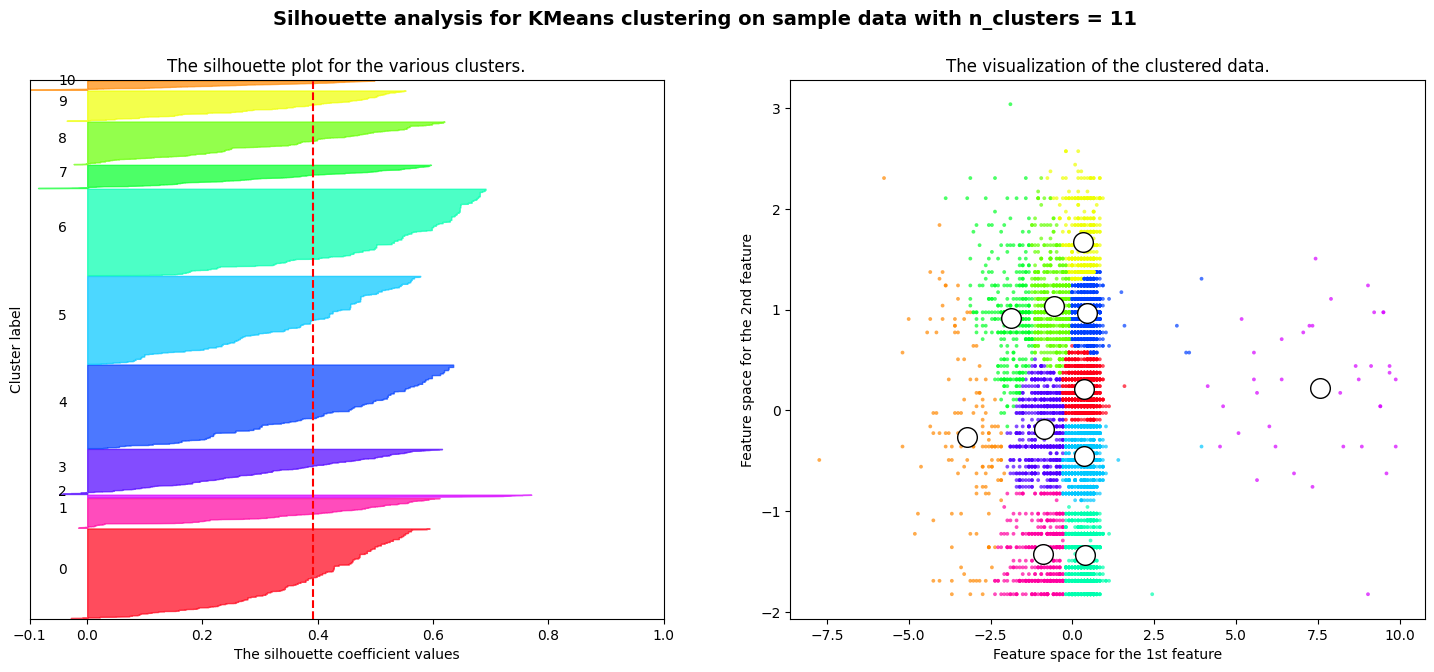

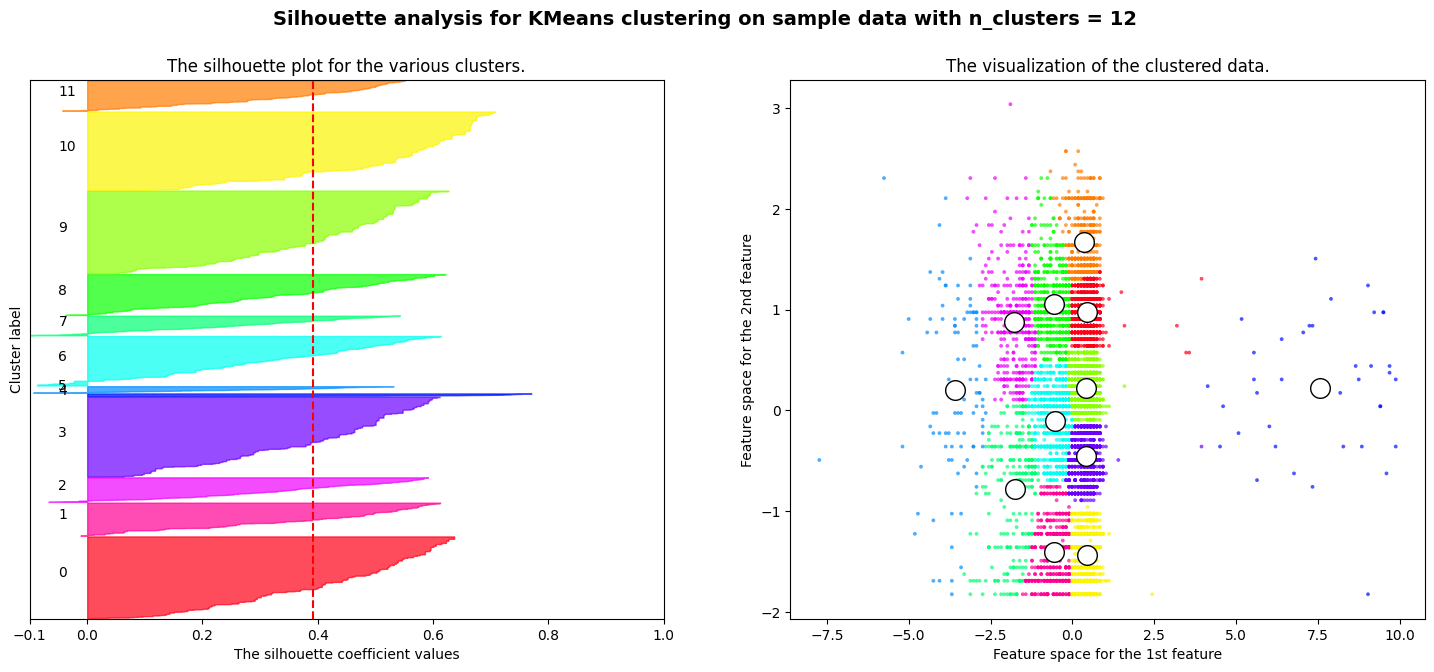

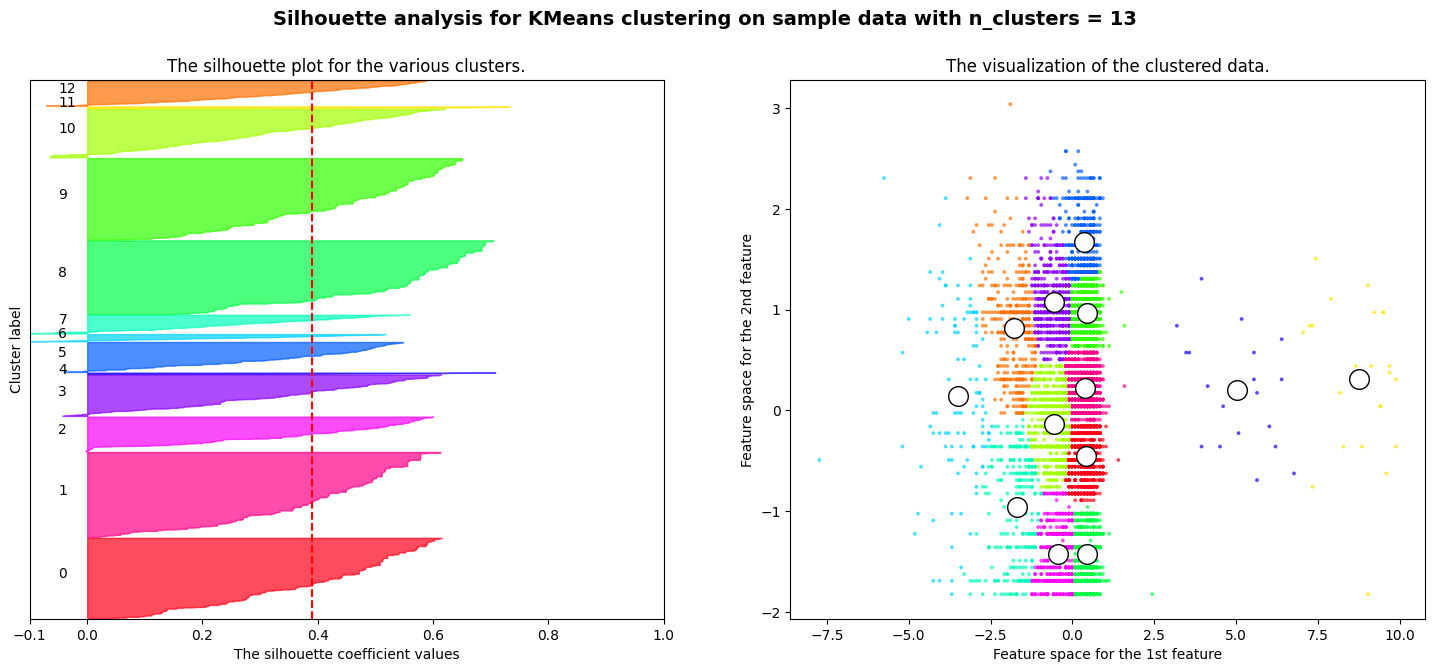

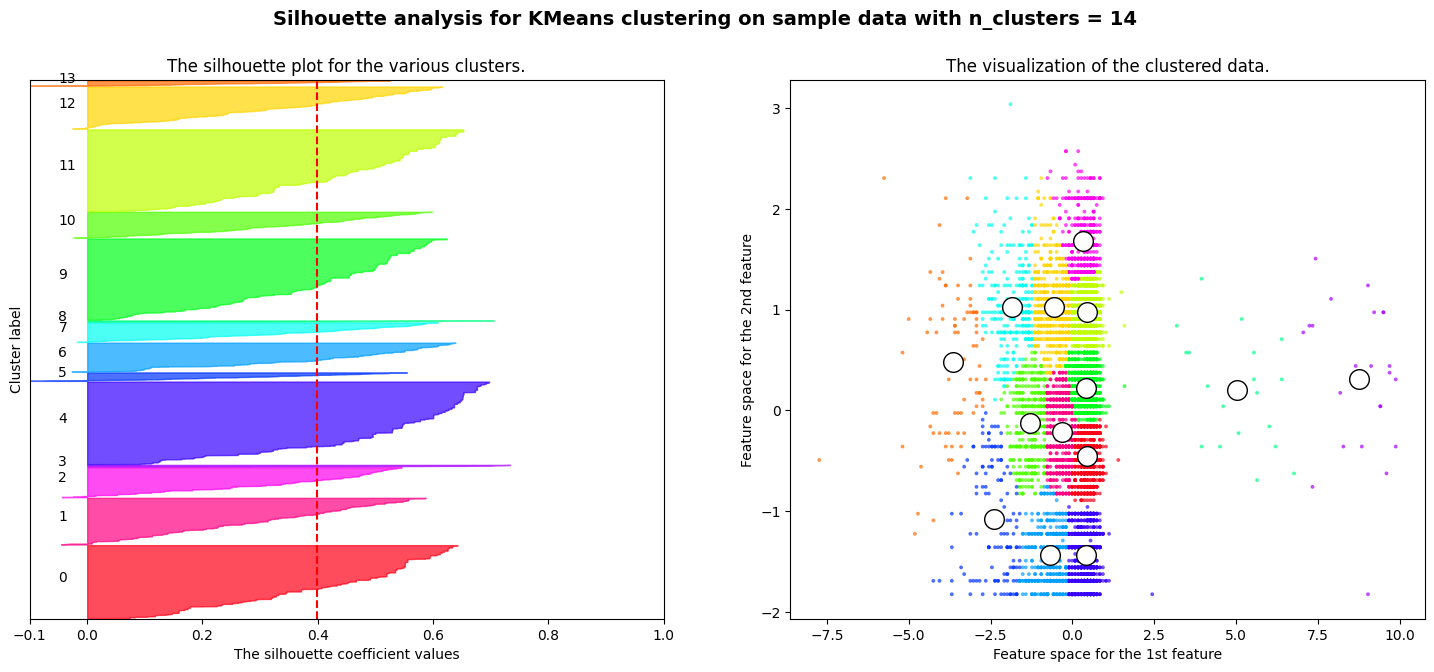

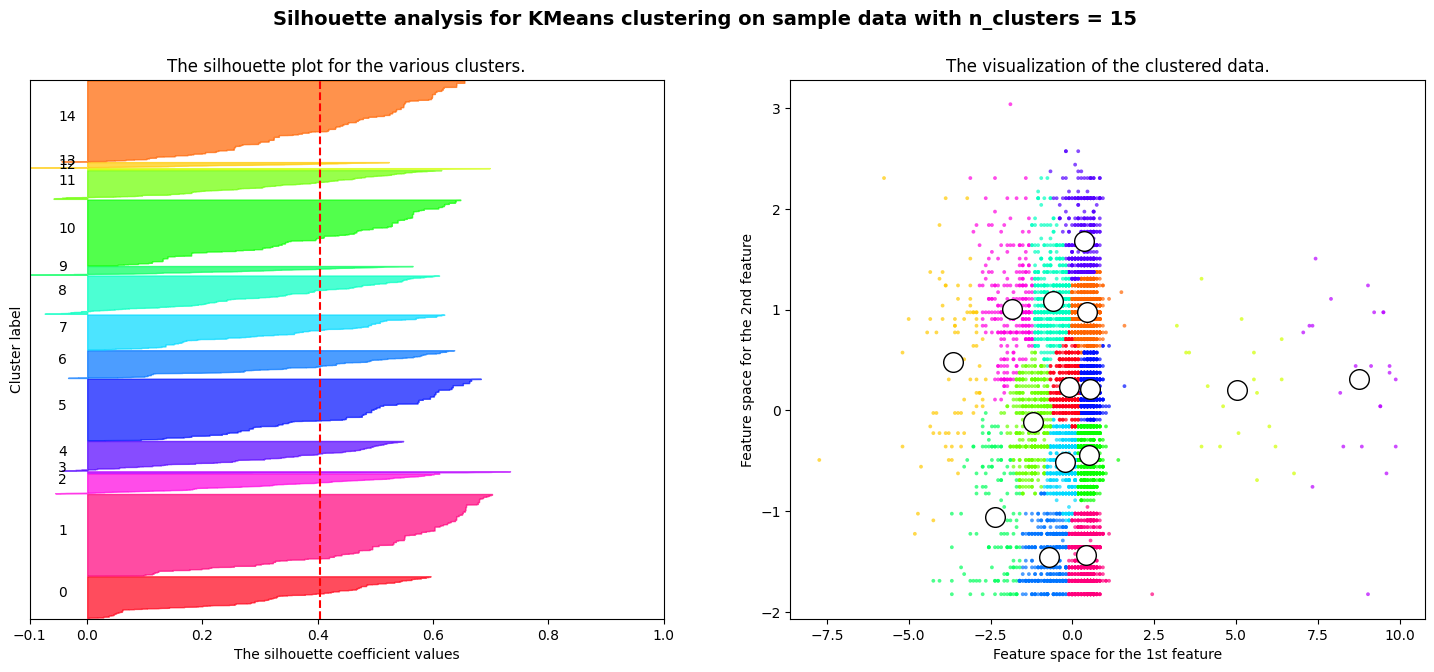

In [ ]:
clusters_range = [i for i in range(2,16)]

for n_clusters in clusters_range:
    # Create a subplot with 1 row and 2 columns :

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample :

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them :

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle :

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)

    # The vertical line for average silhouette score of all the values :

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed :

    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters :

    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers :

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

  

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white") :
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### ML Model - 2 - Heirarchial clustering

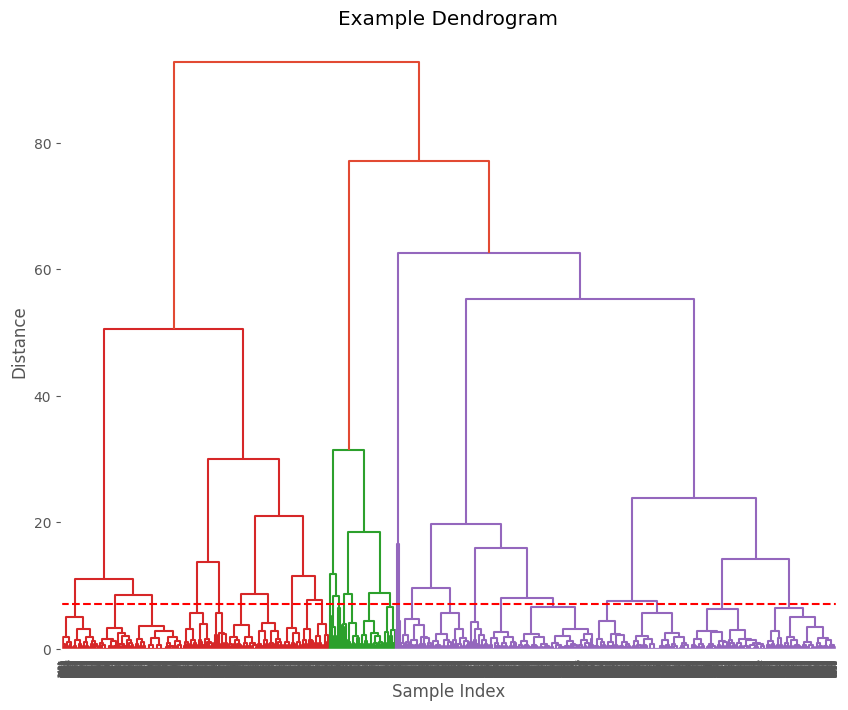

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Set the plot size and style
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')

# Set the color palette for the dendrogram
sch.set_link_color_palette(['#d62728', '#2ca02c', '#9467bd'])

# Create the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Add a horizontal line to indicate the threshold
plt.axhline(y=7, color='r', linestyle='--')

# Set the title and axis labels
plt.title('Example Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Show the plot
plt.show()


### ML Model - 3 - Elbow method.

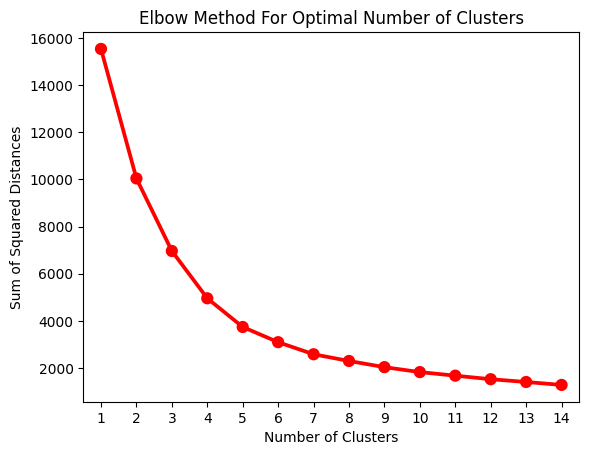

In [ ]:
dists = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    dists[k] = km.inertia_
    
# Plot the graph for the sum of square 

sns.pointplot(x = list(dists.keys()), y = list(dists.values()),color="red")
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [ ]:
# ML Model - 2 Implementation
K_means = KMeans(n_clusters = 6)
# fit the model
K_means.fit(X)
# predict on the model
y_K_means= K_means.predict(X)

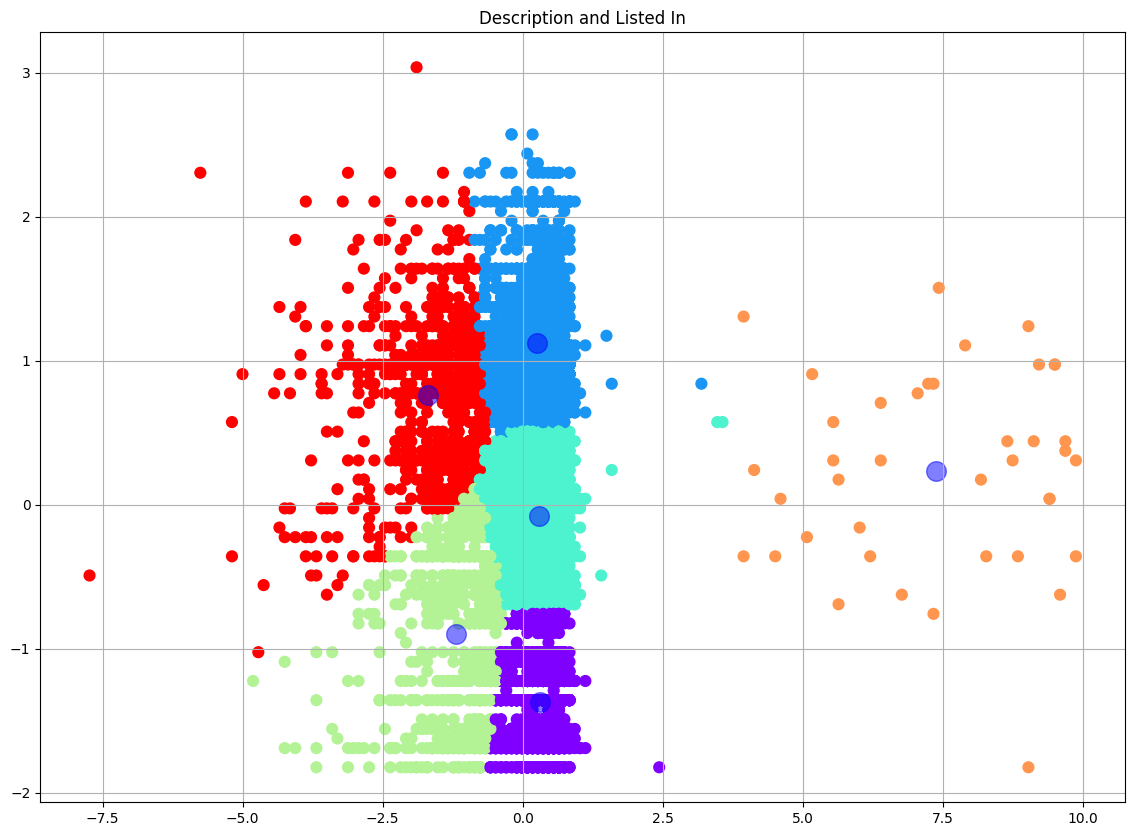

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(14,10))
plt.title('Description and Listed In')
plt.scatter(X[:, 0], X[:, 1], c=y_K_means, s=60, cmap='rainbow')
plt.grid()
centers = K_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

### Vectorizing Text Data with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use logarithmic form for frequency with sublinear_tf set to True
# Keep only words present in at least 10 documents with min_df set to 10
# Set norm to l2 to ensure feature vectors have a euclidian norm of 1
# Consider both unigrams and bigrams with ngram_range set to (1, 2)
# Remove common English pronouns with stop_words set to 'english'

tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df_fe["listed_in"])

# pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names()).head()

In [ ]:
# Show the dataframe
pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).head()

action  action adventure  adventure  adventure anime  adventure children  \
0  0.00000           0.00000    0.00000              0.0                 0.0   
1  0.00000           0.00000    0.00000              0.0                 0.0   
2  0.00000           0.00000    0.00000              0.0                 0.0   
3  0.21135           0.21135    0.21135              0.0                 0.0   
4  0.00000           0.00000    0.00000              0.0                 0.0   

   adventure classic  adventure comedies  adventure dramas  adventure horror  \
0                0.0                 0.0               0.0               0.0   
1                0.0                 0.0               0.0               0.0   
2                0.0                 0.0               0.0               0.0   
3                0.0                 0.0               0.0               0.0   
4                0.0                 0.0               0.0               0.0   

   adventure independent  ...  tv dramas  tv horror  tv korean  tv mysteries  \
0               0.000000  ...   0.228523        0.0        0.0           0.0   
1               0.000000  ...   0.000000        0.0        0.0           0.0   
2               0.000000  ...   0.000000        0.0        0.0           0.0   
3               0.476294  ...   0.000000        0.0        0.0           0.0   
4               0.000000  ...   0.000000        0.0        0.0           0.0   

   tv romantic    tv sci  tv shows  tv spanish  tv thrillers  tv tv  
0          0.0  0.378081   0.17468         0.0           0.0    0.0  
1          0.0  0.000000   0.00000         0.0           0.0    0.0  
2          0.0  0.000000   0.00000         0.0           0.0    0.0  
3          0.0  0.000000   0.00000         0.0           0.0    0.0  
4          0.0  0.000000   0.00000         0.0           0.0    0.0  

[5 rows x 164 columns]

In [ ]:
def find_similar_cluster_items(name):
    # Find the input item in the data frame
    input_item = df_fe.loc[df_fe['title'].str.lower() == name.lower()]
    
    # Get the cluster number and type of the input item
    cluster_num = input_item['Cluster Label'].iloc[0]
    item_type = input_item.type.iloc[0]
    
    # Find items in the same cluster and of the same type as the input item
    similar_items = df_fe.loc[(df_fe['Cluster Label'] == cluster_num) & (df_fe['type'] == item_type)]
    
    # Randomly select 10 items from the similar items
    similar_items = similar_items.sample(10)
    
    print("The cluster number is {}".format(cluster_num))
    
    # Return the titles of the similar items
    return list(similar_items['title'])


In [ ]:
df_fe.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_name', 'day_added', 'year_added', 'month_added', 'rat_cats',
       'Length(listed_in)', 'Length(description)', 'Cluster Label'],
      dtype='object')

In [ ]:
find_similar_cluster_items('3 idiots')

The cluster number is 1


['Bride For Rent',
 'The Unborn Child',
 'Ice Guardians',
 'Sand Castle',
 'It Takes a Man and a Woman',
 'The Royal Hibiscus Hotel',
 'Paradise Beach',
 'Next Enti?',
 'Son of a Gun',
 'Teefa in Trouble']

In [ ]:
# Convert the first row of the tfidf_matrix to a dense array
tfidf_array = tfidf_matrix[0].toarray()

# Flatten the array to a 1D array
tfidf_array = tfidf_array.flatten()

# Create a DataFrame from the tfidf_array
# The index of the DataFrame is set to the feature names from the tfidf_vectorizer
# The column of the DataFrame is named "tf-idf score"
df = pd.DataFrame(tfidf_array, index=tfidf.get_feature_names_out(), columns=["tf-idf score"])
df

tf-idf score
000              0.0
007              0.0
009              0.0
10               0.0
100              0.0
...              ...
ömer             0.0
über             0.0
łukasz           0.0
ōarai            0.0
şeref            0.0

[17888 rows x 1 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Create a CountVectorizer object and fit it on the description column of df_fe
count_vect = CountVectorizer(stop_words='english')
count_matrix = count_vect.fit_transform(df_fe['description'])

# Create a TfidfTransformer object and fit it on the count matrix
tfidf_trans = TfidfTransformer()
tfidf_matrix = tfidf_trans.fit_transform(count_matrix)

# Print the count matrix
print("Count matrix: {}".format(count_matrix.toarray()))

# Print the inverse document frequencies
print("Inverse document frequencies: {}".format(tfidf_trans.idf_))


Count matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Inverse document frequencies: [6.40280607 8.34871622 9.26500695 ... 9.26500695 9.26500695 9.26500695]


In [ ]:
# Create a DataFrame with the inverse document frequencies
# The index of the DataFrame is set to the feature names from the CountVectorizer
# The column of the DataFrame is named 'idf_weights'
idf_df = pd.DataFrame(tfidf_trans.idf_, index=count_vect.get_feature_names_out(), columns=['idf_weights'])
idf_df

idf_weights
000        6.402806
007        8.348716
009        9.265007
10         6.244582
100        7.250104
...             ...
ömer       9.265007
über       8.859542
łukasz     9.265007
ōarai      9.265007
şeref      9.265007

[17888 rows x 1 columns]



*   cosine similarity recommendation



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Create a list of program titles
program_list = df_fe['title'].to_list()


In [ ]:
# Define a function to recommend programs based on cosine similarity
def recommend_program(title, cosine_similarity=cosine_sim_matrix):
    # Find the index of the input title in the program list
    title_index = program_list.index(title)
    
    # Get the cosine similarity scores for the input title
    sim_scores = list(enumerate(cosine_similarity[title_index]))
    
    # Sort the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    
    # Get the indices of the recommended programs
    recommend_indices = [i[0] for i in sim_scores]
    
    # Get the titles of the recommended programs
    rec_programs = df_fe['title'].iloc[recommend_indices]
    
    # Get the similarity scores of the recommended programs
    rec_scores = [round(i[1], 4) for i in sim_scores]
    
    # Create a DataFrame with the recommended programs and their similarity scores
    rec_table = pd.DataFrame(list(zip(rec_programs, rec_scores)), columns=['Recommended program', 'Similarity (0-1)'])
    
    return rec_table


In [ ]:
recommend_program("3 Idiots")

Recommended program  Similarity (0-1)
0                      College Romance            0.2317
1                    Engineering Girls            0.1727
2                            Candy Jar            0.1525
3                            Mr. Young            0.1512
4  100 Things to do Before High School            0.1478
5                               Pahuna            0.1470
6                       Best Neighbors            0.1466
7                           Be with Me            0.1364
8                          Moms at War            0.1346
9                             Lovesong            0.1287

# **Conclusion**


### EDA Findings:

* Netflix tends to add new content towards the end of the current year and the beginning of the next year.
* In 2019, Netflix's content consisted of approximately 70% movies and 30% TV shows.
* There was a noticeable decrease in new content after 2020 due to the COVID-19 pandemic.
* The most popular genre on Netflix is comedy.
* Around 30% of movies and 50% of TV shows on Netflix are original productions.
* India has the second highest amount of content available on Netflix, with the United States having the most.
* Content categories by country:
  1. India has the most teen content.
  2. Spain has the most adult content.
  3. Canada has the most kids content.
  4. Japan has the most older kids content.

* These insights are valuable for business development and SWOT analysis.

### Clustering Conclusions:
* We tested 3 machine learning models:
 1. K-means clustering
 2. Elbow curve
 3. Hierarchical clustering

* K-means clustering is the best model for this dataset.
* K-means clustering indicated that 4 is the optimal number of clusters with a silhouette score of 0.44. 
* However, after cross-validation with the Elbow curve, we selected 6 as the 
  optimal number of clusters.

* The cosine-based recommender system performed very well.

Is there anything else you would like me to change?

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***